<a href="https://colab.research.google.com/github/ivydey/MCA_PROJECT/blob/main/ivy_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/cirrhosis.csv')
list_accuracy_knn=[]
list_accuracy_svm=[]
list_accuracy_DecisionTree=[]

In [ ]:
print(dataset)
dataset.head()

      ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly  \
0      1     400      D  D-penicillamine  21464   F       Y            Y   
1      2    4500      C  D-penicillamine  20617   F       N            Y   
2      3    1012      D  D-penicillamine  25594   M       N            N   
3      4    1925      D  D-penicillamine  19994   F       N            Y   
4      5    1504     CL          Placebo  13918   F       N            Y   
..   ...     ...    ...              ...    ...  ..     ...          ...   
413  414     681      D              NaN  24472   F     NaN          NaN   
414  415    1103      C              NaN  14245   F     NaN          NaN   
415  416    1055      C              NaN  20819   F     NaN          NaN   
416  417     691      C              NaN  21185   F     NaN          NaN   
417  418     976      C              NaN  19358   F     NaN          NaN   

    Spiders Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0      

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [ ]:
dataset.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [ ]:
dataset.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [ ]:
ppd = dataset.drop(['ID'], axis=1)
ppd

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
categorical_val = []
continous_val = []
for column in ppd.columns:
    print("--------------------")
    print(f"{column} : {ppd[column].unique()}")
    if len(ppd[column].unique()) <=10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
N_Days : [ 400 4500 1012 1925 1504 2503 1832 2466 2400   51 3762  304 3577 1217
 3584 3672  769  131 4232 1356 3445  673  264 4079 4127 1444   77  549
 4509  321 3839 4523 3170 3933 2847 3611  223 3244 2297 4467 1350 4453
 4556 3428 4025 2256 2576 4427  708 2598 3853 2386 1000 1434 1360 1847
 3282 4459 2224 4365 4256 3090  859 1487 3992 4191 2769 4039 1170 3458
 4196 4184 4190 1827 1191   71  326 1690 3707  890 2540 3574 4050 4032
 3358 1657  198 2452 1741 2689  460  388 3913  750  130 3850  611 3823
 3820  552 3581 3099  110 3086 3092 3222 3388 2583 2504 2105 2350  980
 3395 3422 3336 1083 2288  515 2033  191 3297  971 3069 2468  824 3255
 1037 3239 1413  850 2944 2796 3149 3150 3098 2990 1297 2106 3059 3050
 2419  786  943 2976 2615 2995 1427  762 2891 2870 1152 2863  140 2666
  853 2835 2475 1536 2772 2797  186 2055 1077 2721 1682 2713 1212 2692
 2574 2301 2657 2644 2624 1492 2609 2580 2573 2563 2556 2555 2241  974
 2527 1576  733 2332 2456  216 2443  797 2449 2

In [ ]:
categorical_val.remove('Status')
dfs = pd.get_dummies(ppd, columns = categorical_val)

In [ ]:
dfs.head()

,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,400,D,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,...,True,False,True,False,False,True,False,False,False,True
1,4500,C,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,...,True,False,True,True,False,False,False,False,True,False
2,1012,D,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,...,False,True,False,False,True,False,False,False,False,True
3,1925,D,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,...,True,False,True,False,True,False,False,False,False,True
4,1504,CL,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,...,True,False,True,True,False,False,False,False,True,False


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dfs['Status']= label_encoder.fit_transform(dfs['Status'])

In [ ]:
dfs.head()

,N_Days,Status,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,...,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0
0,400,2,21464,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,...,True,False,True,False,False,True,False,False,False,True
1,4500,0,20617,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,...,True,False,True,True,False,False,False,False,True,False
2,1012,2,25594,1.4,176.0,3.48,210.0,516.0,96.10,55.0,...,False,True,False,False,True,False,False,False,False,True
3,1925,2,19994,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,...,True,False,True,False,True,False,False,False,False,True
4,1504,1,13918,3.4,279.0,3.53,143.0,671.0,113.15,72.0,...,True,False,True,True,False,False,False,False,True,False


In [ ]:
dfs = dfs.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [ ]:
dfs.isna().sum()

N_Days                  0
Status                  0
Age                     0
Bilirubin               0
Cholesterol             0
Albumin                 0
Copper                  0
Alk_Phos                0
SGOT                    0
Tryglicerides           0
Platelets               0
Prothrombin             0
Drug_D-penicillamine    0
Drug_Placebo            0
Sex_F                   0
Sex_M                   0
Ascites_N               0
Ascites_Y               0
Hepatomegaly_N          0
Hepatomegaly_Y          0
Spiders_N               0
Spiders_Y               0
Edema_N                 0
Edema_S                 0
Edema_Y                 0
Stage_1.0               0
Stage_2.0               0
Stage_3.0               0
Stage_4.0               0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc = MinMaxScaler()
col_to_scale = ['N_Days','Age', 'Bilirubin', 'Cholesterol', 'Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [ ]:
print(dfs)

       N_Days  Status       Age  Bilirubin  Cholesterol   Albumin    Copper  \
0    0.075515       2  0.622822   0.512635     0.085196  0.238806  0.260274   
1    0.937947       0  0.578364   0.028881     0.109970  0.813433  0.085616   
2    0.204249       2  0.839597   0.039711     0.033837  0.567164  0.352740   
3    0.396298       2  0.545664   0.054152     0.074924  0.216418  0.102740   
4    0.307741       1  0.226748   0.111913     0.096073  0.585821  0.238014   
..        ...     ...       ...        ...          ...       ...       ...   
413  0.134623       2  0.780705   0.032491     0.084592  0.373134  0.082192   
414  0.223391       0  0.243911   0.021661     0.084592  0.697761  0.082192   
415  0.213294       0  0.588967   0.046931     0.084592  0.544776  0.082192   
416  0.136727       0  0.608178   0.018051     0.084592  0.667910  0.082192   
417  0.196676       0  0.512282   0.014440     0.084592  0.496269  0.082192   

     Alk_Phos      SGOT  Tryglicerides  ...  Hepato

In [ ]:
# Create feature and target arrays
X = dfs.drop('Status', axis=1)
Y = dfs.Status


In [ ]:
test_sizes=[0.1,0.2,0.3]
test_sizes

[0.1, 0.2, 0.3]

 Accuracy for iteration  1 : 71.43%
 Accuracy for iteration  2 : 69.05%
 Accuracy for iteration  3 : 66.67%
 Accuracy for iteration  4 : 73.81%
 Accuracy for iteration  5 : 76.19%
 Accuracy for iteration  6 : 54.76%
 Accuracy for iteration  7 : 69.05%
 Accuracy for iteration  8 : 71.43%
 Accuracy for iteration  9 : 71.43%
 Accuracy for iteration  10 : 71.43%
 Accuracy for iteration  11 : 61.90%
 Accuracy for iteration  12 : 71.43%
 Accuracy for iteration  13 : 66.67%
 Accuracy for iteration  14 : 61.90%
 Accuracy for iteration  15 : 64.29%
 Accuracy for iteration  16 : 57.14%
 Accuracy for iteration  17 : 50.00%
 Accuracy for iteration  18 : 71.43%
 Accuracy for iteration  19 : 71.43%
 Accuracy for iteration  20 : 59.52%

Mean accuracy: 66.55%

Variance accuracy: 46.19%

Standard deviation accuracy: 6.80%
Training time: 0.043018341064453125
Accuracy: 0.5952380952380952
Mean_recall: 0.41938405797101447
Mean_precision: nan


<ipython-input-13-19b63ea66b96>:49: RuntimeWarning: invalid value encountered in divide
  precision=np.diag(cm)/np.sum(cm,axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

              precision    recall  f1-score   support

           0       0.62      0.70      0.65        23
           1       0.00      0.00      0.00         3
           2       0.56      0.56      0.56        16

    accuracy                           0.60        42
   macro avg       0.39      0.42      0.41        42
weighted avg       0.55      0.60      0.57        42

 Accuracy for iteration  1 : 65.48%
 Accuracy for iteration  2 : 69.05%
 Accuracy for iteration  3 : 60.71%
 Accuracy for iteration  4 : 75.00%
 Accuracy for iteration  5 : 70.24%
 Accuracy for iteration  6 : 58.33%
 Accuracy for iteration  7 : 67.86%
 Accuracy for iteration  8 : 75.00%
 Accuracy for iteration  9 : 66.67%
 Accuracy for iteration  10 : 70.24%
 Accuracy for iteration  11 : 67.86%
 Accuracy for iteration  12 : 69.05%
 Accuracy for iteration  13 : 66.67%
 Accuracy for iteration  14 : 61.90%
 Accuracy for iteration  15 : 67.86%
 Accuracy for iteration  16 : 59.52%
 Accuracy for iteration  17 : 59.52%

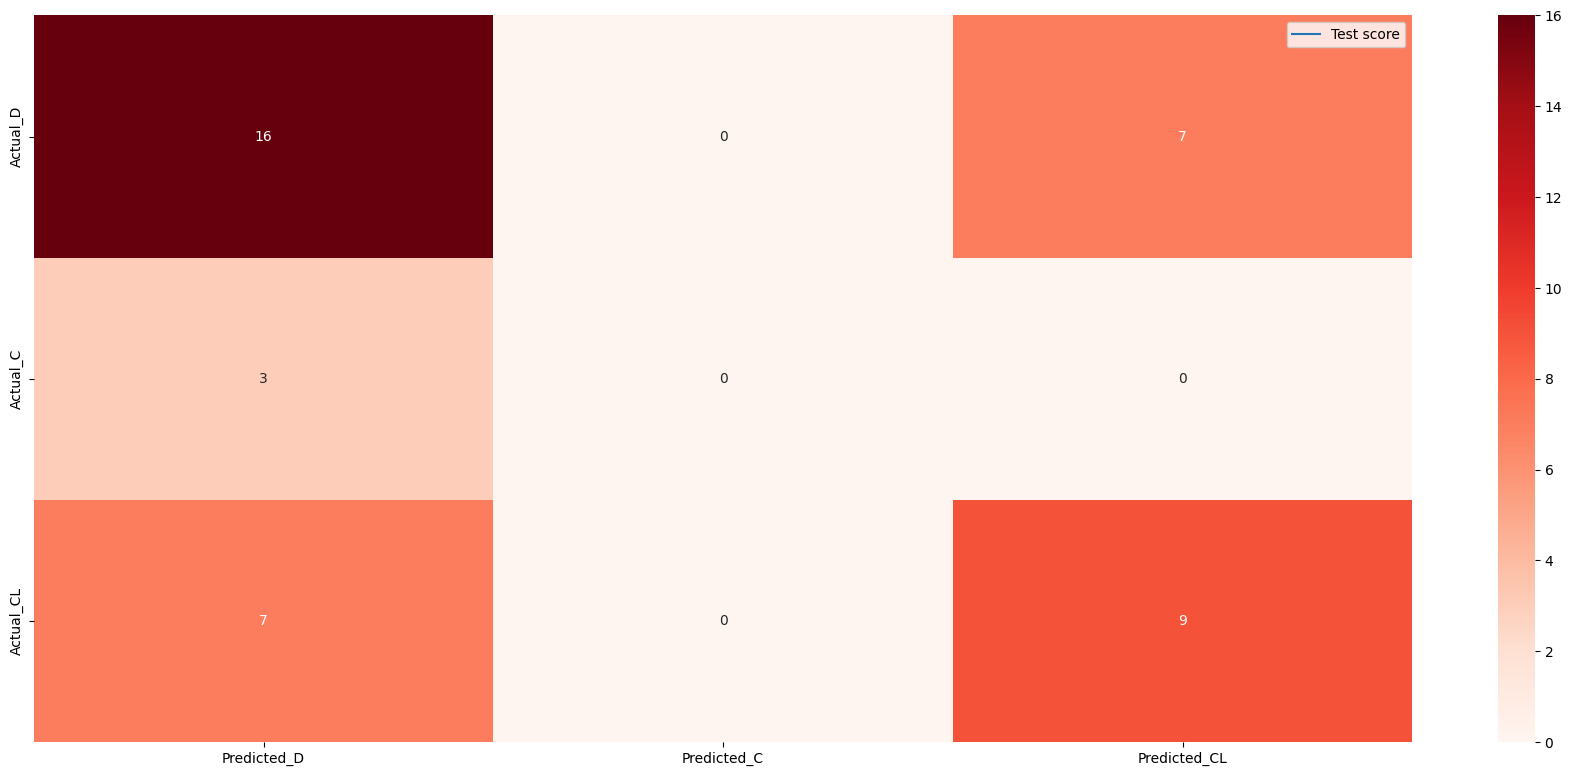

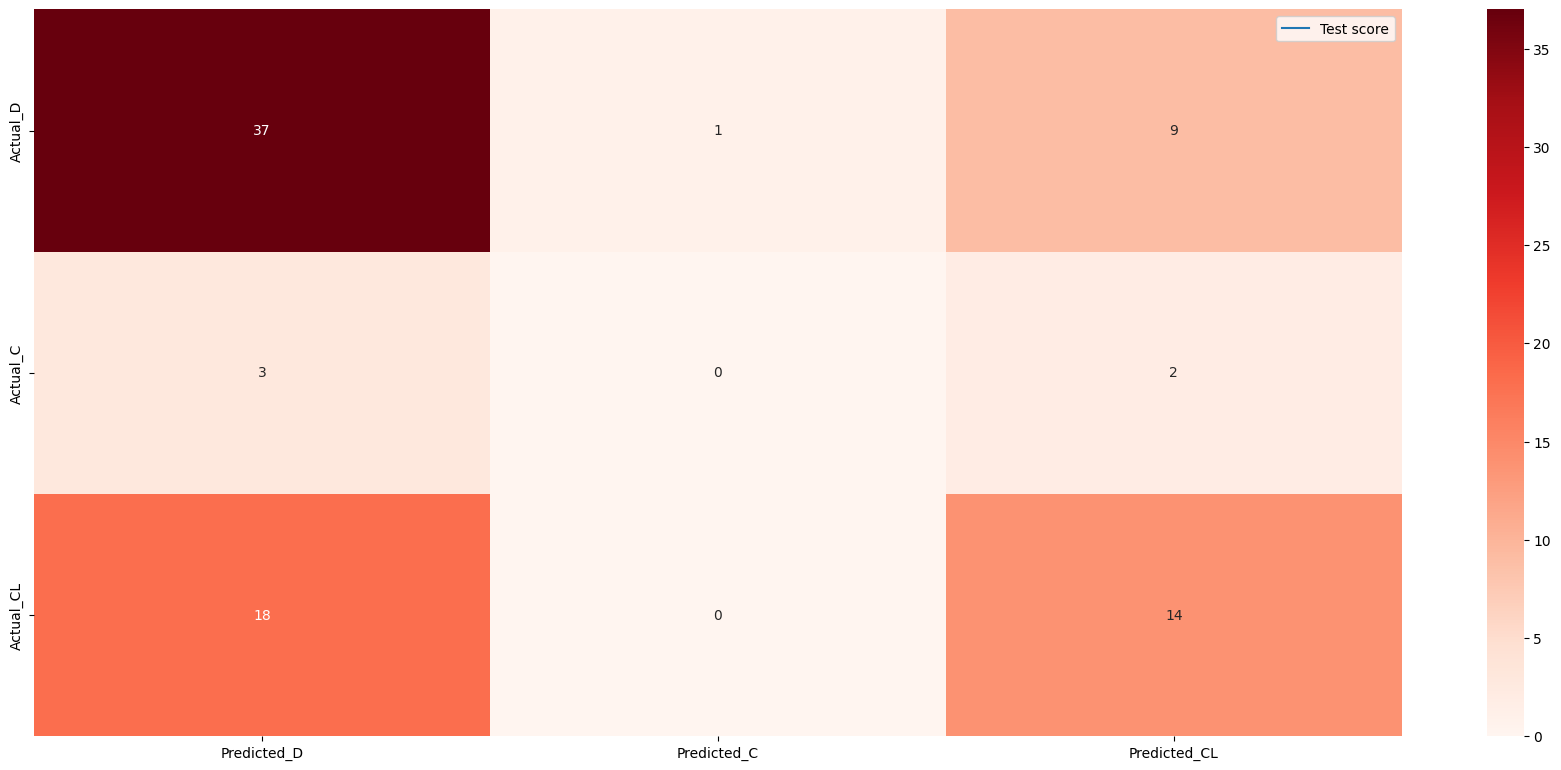

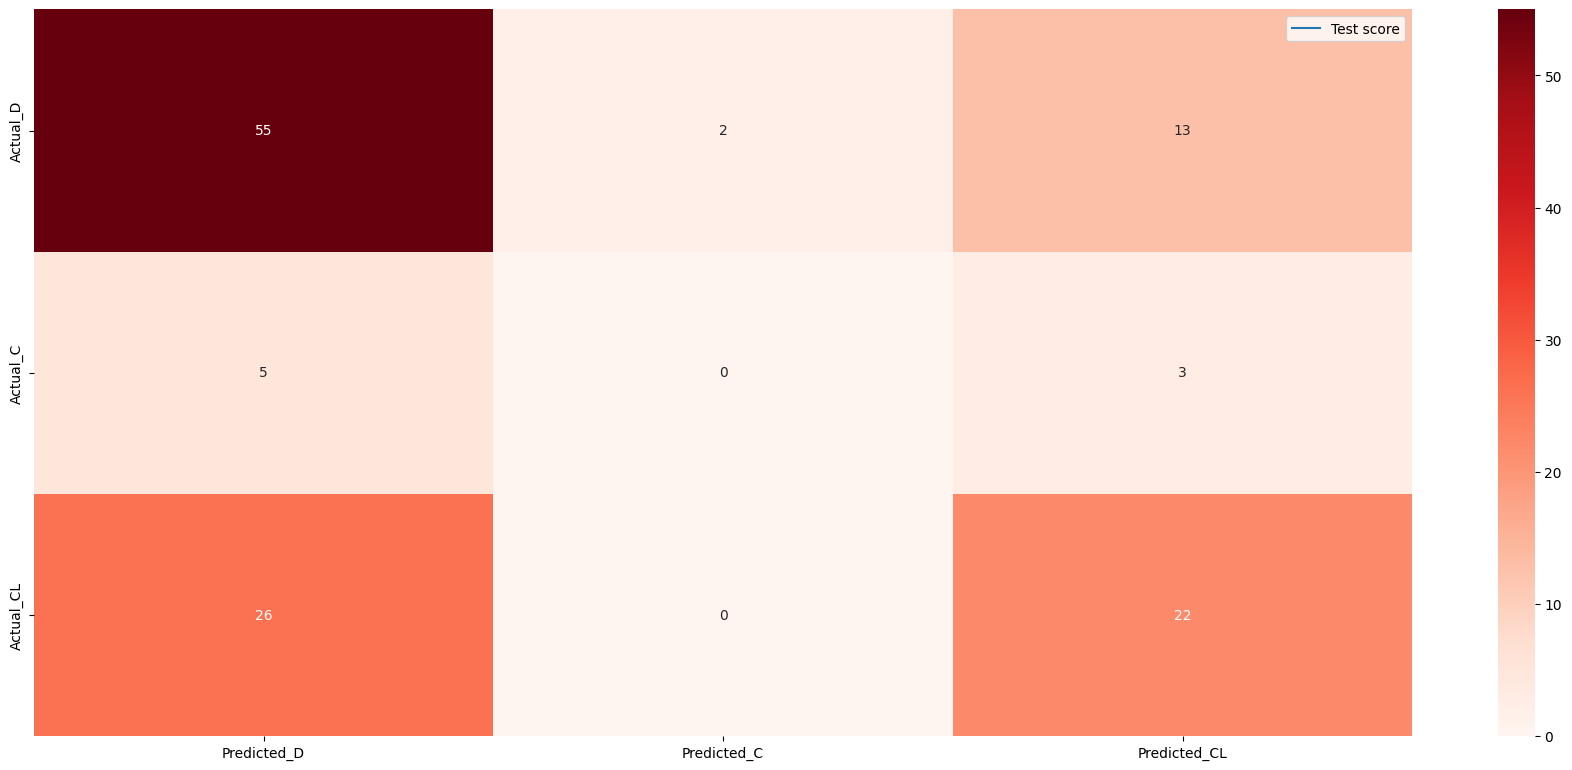

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from numpy import random
for test_size in test_sizes:
  accuracies=[]
  neighbors =  range(1, 21)
  for i  in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,stratify=Y, random_state=i)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(X_train,Y_train)
    predicted = knn_model.predict(X_test)
    expected = Y_test
    accuracy = accuracy_score(expected,predicted) * 100
    accuracies.append(accuracy)
    print(f' Accuracy for iteration  {i+1} : {accuracy:.2f}%')

  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)
  mean_accuracy = np.mean(accuracies)
  variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
  standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

  plt.figure(figsize=(18, 8))
  plt.plot(neighbors, accuracies, label="Test score")
  plt.xticks(np.arange(1, 21, 1))
  plt.xlabel("ITERATIONS")
  plt.ylabel("ACCURACY SCORE")
  plt.legend()
  plt.tight_layout()


  print(f'\nMean accuracy: {mean_accuracy:.2f}%')
  print(f'\nVariance accuracy: {variance_accuracy:.2f}%')
  print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.2f}%')
  import time
  from sklearn.metrics import confusion_matrix
  t0 = time.time()
  knn_model.fit(X_train,Y_train)
  Y_pred1 = knn_model.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred1)
  print("Training time:", time.time()-t0)
  print("Accuracy:",accuracy)
  list_accuracy_knn.append(accuracy)
  test_data=np.array(Y_test)
  cm = confusion_matrix(test_data,Y_pred1)
  recall=np.diag(cm)/np.sum(cm,axis=1)
  precision=np.diag(cm)/np.sum(cm,axis=0)
  mean_recall=np.mean(recall)
  mean_precision=np.mean(precision)
  print("Mean_recall:",mean_recall)
  print("Mean_precision:",mean_precision)
  import seaborn as sns
  #List = ['D','C','CL']
  #fig=plt.figure(figsize=(17,5))
  #ax1=plt.subplot(121)
  #sn.heatmap(cm,annot=True,cmap='Reds',yticklabels=List,xticklabels=List)
  #pd.crosstab(List,List)
  labels = ['C','CL','D']
  def plot2(y_true, y_pred):
    labels = ['C','CL','D']
    column = [f'Predicted_{label}' for label in labels]
    indices = [f'Actual_{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='Reds')
    fig=plt.figure(figsize=(17,5))
    ax1=plt.subplot(121)
    return sns.heatmap(table,annot=True,cmap='Reds',yticklabels=column,xticklabels=indices)

  plot2(test_data, Y_pred1);
  #pd.crosstab(List,List)
  from sklearn.metrics import classification_report
  print(classification_report(test_data,Y_pred1))

SVM
# PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
parameters = {
               'kernel':['linear','poly','rbf','sigmoid'],
               'C' : [1, 5, 10, 20]
}

In [ ]:
classifier = GridSearchCV(model, parameters, cv=5)

In [ ]:
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
classifier.cv_results_

{'mean_fit_time': array([0.01086102, 0.01001878, 0.00981207, 0.01588135, 0.012397  ,
        0.01072135, 0.00969195, 0.02003593, 0.04311304, 0.03950753,
        0.02036824, 0.01120224, 0.01778731, 0.0120121 , 0.00997996,
        0.01015677]),
 'std_fit_time': array([0.00450982, 0.00234151, 0.00055265, 0.00459271, 0.00092876,
        0.00143298, 0.00024342, 0.01074352, 0.01945698, 0.00779894,
        0.0077301 , 0.00040286, 0.00245463, 0.00087142, 0.00020368,
        0.00033293]),
 'mean_score_time': array([0.00338926, 0.00460887, 0.00431008, 0.00532851, 0.00382047,
        0.00413284, 0.0042285 , 0.00755014, 0.01360455, 0.00904355,
        0.00984316, 0.00452042, 0.00343041, 0.00353608, 0.00481048,
        0.00414658]),
 'std_score_time': array([1.84392479e-04, 1.26762432e-03, 1.36570557e-04, 1.25401643e-03,
        5.70368950e-04, 1.04481128e-03, 1.23722621e-04, 3.64559970e-03,
        4.34907289e-03, 3.72789554e-03, 4.73050940e-03, 6.55112548e-04,
        4.66495424e-05, 3.48892335e-

In [ ]:
best_parameters = classifier.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'linear'}


In [ ]:
highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.7510327022375216


In [ ]:
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010861,0.004510,0.003389,0.000184,1,linear,"{'C': 1, 'kernel': 'linear'}",0.773810,0.797619,0.750000,0.746988,0.686747,0.751033,0.036984,1
1,0.010019,0.002342,0.004609,0.001268,1,poly,"{'C': 1, 'kernel': 'poly'}",0.702381,0.726190,0.714286,0.746988,0.554217,0.688812,0.068892,9
2,0.009812,0.000553,0.004310,0.000137,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.666667,0.702381,0.690476,0.734940,0.662651,0.691423,0.026288,8
3,0.015881,0.004593,0.005329,0.001254,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.714286,0.654762,0.666667,0.662651,0.638554,0.667384,0.025350,13
4,0.012397,0.000929,0.003820,0.000570,5,linear,"{'C': 5, 'kernel': 'linear'}",0.726190,0.833333,0.726190,0.734940,0.686747,0.741480,0.048873,2
5,0.010721,0.001433,0.004133,0.001045,5,poly,"{'C': 5, 'kernel': 'poly'}",0.702381,0.678571,0.702381,0.722892,0.626506,0.686546,0.033139,10
6,0.009692,0.000243,0.004228,0.000124,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.702381,0.666667,0.750000,0.734940,0.722892,0.715376,0.028912,5
7,0.020036,0.010744,0.007550,0.003646,5,sigmoid,"{'C': 5, 'kernel': 'sigmoid'}",0.714286,0.547619,0.595238,0.566265,0.638554,0.612392,0.059471,15
8,0.043113,0.019457,0.013605,0.004349,10,linear,"{'C': 10, 'kernel': 'linear'}",0.726190,0.821429,0.726190,0.686747,0.698795,0.731870,0.047361,3
9,0.039508,0.007799,0.009044,0.003728,10,poly,"{'C': 10, 'kernel': 'poly'}",0.690476,0.666667,0.702381,0.650602,0.686747,0.679375,0.018419,11


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
classifier= DecisionTreeClassifier(random_state=30)

for test_size in test_sizes:
  accuracies=[]
  neighbors =  range(1, 21)
  for i  in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,stratify=Y)

    classifier.fit(X_train,Y_train)
    predicted = classifier.predict(X_test)
    expected = Y_test
    accuracy = accuracy_score(expected,predicted) * 100
    accuracies.append(accuracy)
    print(f' Accuracy for iteration  {i+1} : {accuracy:.4f}%')

  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)
  mean_accuracy = np.mean(accuracies)
  variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
  standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

 # plt.figure(figsize=(18, 8))
  #plt.plot(neighbors, accuracies, label="Test score")
  #plt.xticks(np.arange(1, 21, 1))
  #plt.xlabel("ITERATIONS")
  #plt.ylabel("ACCURACY SCORE")
  #plt.legend()
  #plt.tight_layout()


  print(f'\nMean accuracy: {mean_accuracy:.4f}%')
  print(f'\nVariance accuracy: {variance_accuracy:.4f}%')
  print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.4f}%')

  #from sklearn.metrics import confusion_matrix
  #import seaborn as sns

  #classifier.fit(X_train,Y_train)
  #Y_pred1 = classifier.predict(X_test)
  #accuracy=accuracy_score(Y_test,Y_pred1)

  #print("Accuracy:",accuracy)
  #list_accuracy_DecisionTree.append(accuracy)
  #test_data=np.array(Y_test)
  #cm = confusion_matrix(test_data,Y_pred1)
  #recall=np.diag(cm)/np.sum(cm,axis=1)#see muticlass classifiction for recall and precision
  #precision=np.diag(cm)/np.sum(cm,axis=0)
  #mean_recall=np.mean(recall)
  #mean_precision=np.mean(precision)
  #print("Mean_recall:",mean_recall)
  #print("Mean_precision:",mean_precision)
  #labels = ['D','C','CL']
  #def plot2(y_true, y_pred):
    #labels = ['D','C','CL']
   # column = [f'Predicted_{label}' for label in labels]
    #indices = [f'Actual_{label}' for label in labels]
    #table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    #return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    #fig=plt.figure(figsize=(17,5))
    #ax1=plt.subplot(121)
    #return sns.heatmap(table,annot=True,cmap='viridis',yticklabels=column,xticklabels=indices)

  #plot2(test_data, Y_pred1);
  #pd.crosstab(List,List)
  #from sklearn.metrics import classification_report
  #print(classification_report(test_data,Y_pred1))

 Accuracy for iteration  1 : 69.0476%
 Accuracy for iteration  2 : 73.8095%
 Accuracy for iteration  3 : 64.2857%
 Accuracy for iteration  4 : 66.6667%
 Accuracy for iteration  5 : 80.9524%
 Accuracy for iteration  6 : 59.5238%
 Accuracy for iteration  7 : 66.6667%
 Accuracy for iteration  8 : 59.5238%
 Accuracy for iteration  9 : 78.5714%
 Accuracy for iteration  10 : 71.4286%
 Accuracy for iteration  11 : 61.9048%
 Accuracy for iteration  12 : 69.0476%
 Accuracy for iteration  13 : 71.4286%
 Accuracy for iteration  14 : 69.0476%
 Accuracy for iteration  15 : 78.5714%
 Accuracy for iteration  16 : 78.5714%
 Accuracy for iteration  17 : 66.6667%
 Accuracy for iteration  18 : 73.8095%
 Accuracy for iteration  19 : 66.6667%
 Accuracy for iteration  20 : 59.5238%

Mean accuracy: 69.2857%

Variance accuracy: 41.8934%

Standard deviation accuracy: 6.4725%
 Accuracy for iteration  1 : 53.5714%
 Accuracy for iteration  2 : 60.7143%
 Accuracy for iteration  3 : 67.8571%
 Accuracy for iteration

 Accuracy for iteration  1 : 73.8095%
 Accuracy for iteration  2 : 69.0476%
 Accuracy for iteration  3 : 71.4286%
 Accuracy for iteration  4 : 66.6667%
 Accuracy for iteration  5 : 78.5714%
 Accuracy for iteration  6 : 69.0476%
 Accuracy for iteration  7 : 76.1905%
 Accuracy for iteration  8 : 59.5238%
 Accuracy for iteration  9 : 73.8095%
 Accuracy for iteration  10 : 71.4286%
 Accuracy for iteration  11 : 76.1905%
 Accuracy for iteration  12 : 76.1905%
 Accuracy for iteration  13 : 71.4286%
 Accuracy for iteration  14 : 71.4286%
 Accuracy for iteration  15 : 69.0476%
 Accuracy for iteration  16 : 78.5714%
 Accuracy for iteration  17 : 64.2857%
 Accuracy for iteration  18 : 76.1905%
 Accuracy for iteration  19 : 69.0476%
 Accuracy for iteration  20 : 61.9048%

Mean accuracy: 71.1905%

Variance accuracy: 26.5873%

Standard deviation accuracy: 5.1563%
 The best params are: {'max_depth': 4}
Accuracy: 0.6190476190476191
Mean_recall: 0.5114734299516909
Mean_precision: 0.7262626262626263
  

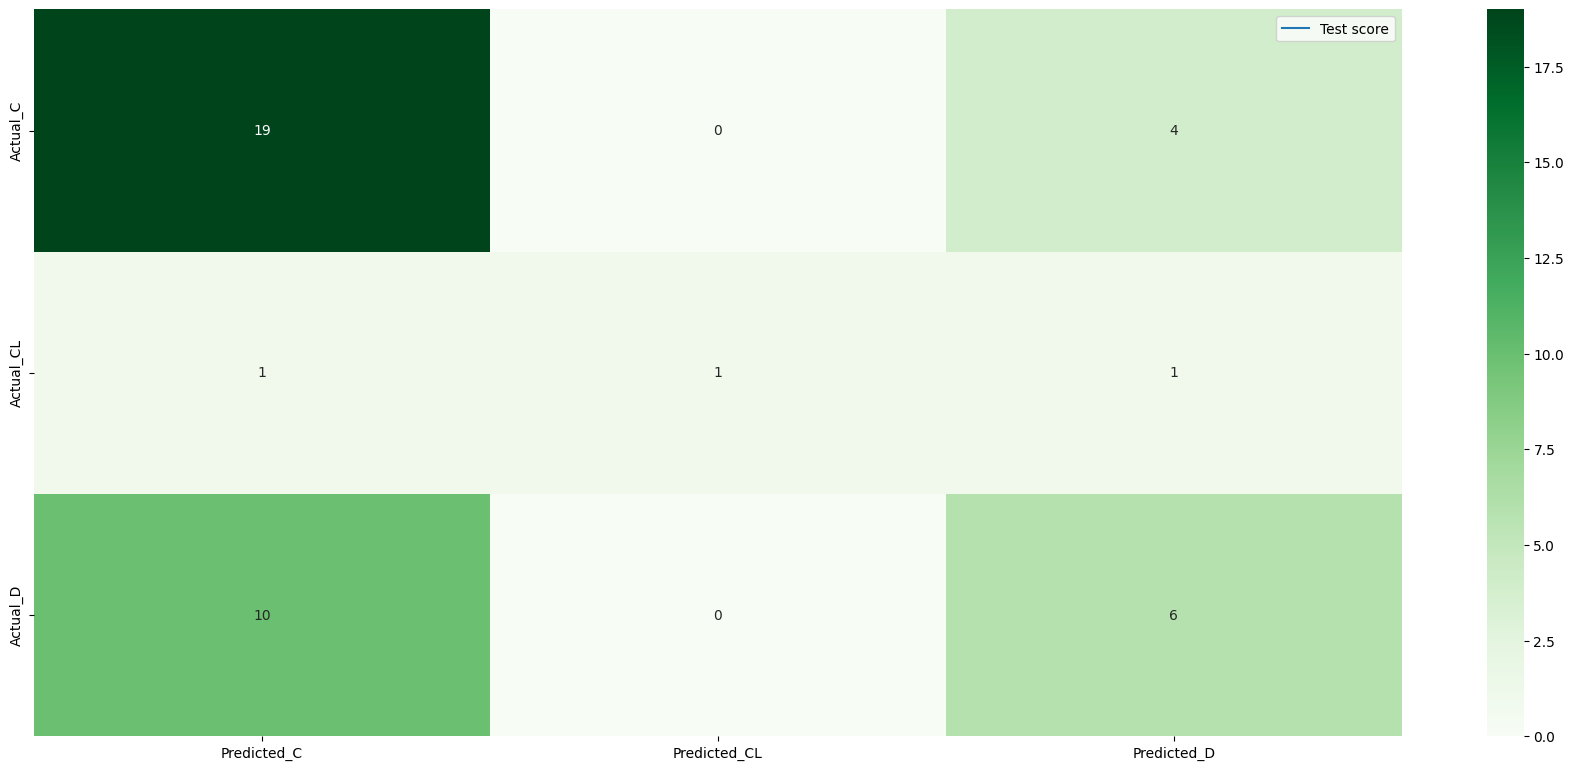

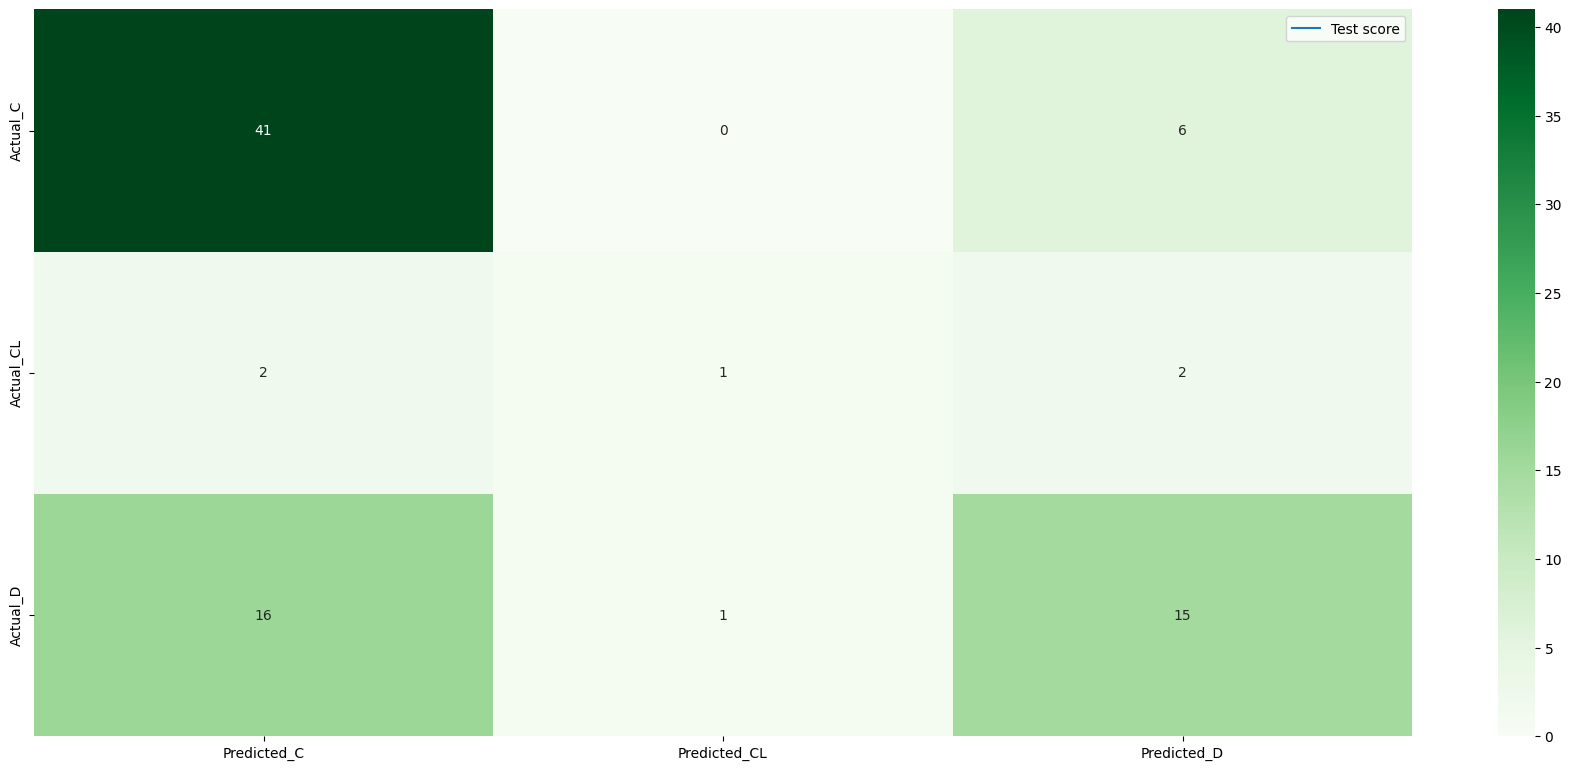

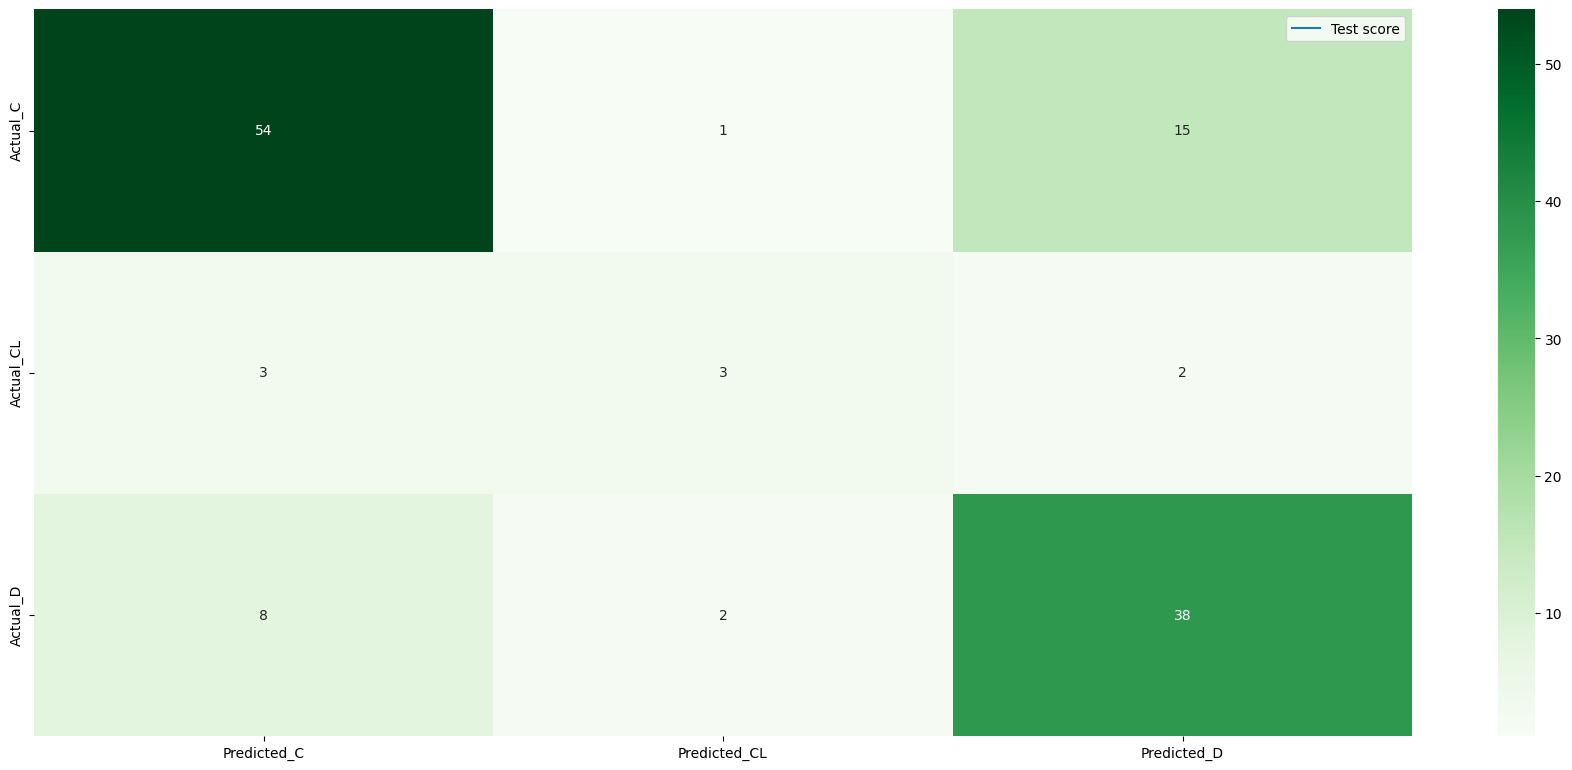

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from numpy import random
test_sizes=[0.1,0.2,0.3]
for test_size in test_sizes:
  accuracies=[]
  neighbors =  range(1, 21)

  for i  in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=test_size, stratify=Y,random_state=i)
    dt_classifier = DecisionTreeClassifier(max_depth=None)

    # Train the classifier on the training data
    dt_classifier.fit(X_train, Y_train)

    # Make predictions on the testing data
    y_pred = dt_classifier.predict(X_test)
    from sklearn.model_selection import GridSearchCV

    param_grid = {'max_depth': range(1,21)}
    grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
    grid_search.fit(X_train, Y_train)
    best_params = grid_search.best_params_
    best_max_depth = best_params['max_depth']

   #Update the classifier with the best parameter
    dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=i)
    dt_classifier.fit(X_train, Y_train)

## 2. Feature Engineering

### Identify important features using feature importance
    feature_importance = dt_classifier.feature_importances_
    important_features = X.columns[np.argsort(feature_importance)[::-1]][:14] # Select top 14 important features
    X_train_subset = X_train[important_features]
    X_test_subset = X_test[important_features]
    Y_pred = dt_classifier.predict(X_test)
    final_accuracy = accuracy_score(Y_test, Y_pred) * 100
    #print("Final Accuracy after improvements:", final_accuracy)
    accuracies.append(final_accuracy)
    print(f' Accuracy for iteration  {i+1} : {final_accuracy:.4f}%')
  plt.figure(figsize=(18, 8))
  plt.plot(neighbors, accuracies, label="Test score")
  plt.xticks(np.arange(1, 21, 1))
  plt.xlabel("ITERATIONS")
  plt.ylabel("ACCURACY SCORE")
  plt.legend()
  plt.tight_layout()

  mean_accuracy = np.mean(accuracies)
  variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
  standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))
  print(f'\nMean accuracy: {mean_accuracy:.4f}%')
  print(f'\nVariance accuracy: {variance_accuracy:.4f}%')
  print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.4f}%')
  print(" The best params are:", best_params)
  from sklearn.metrics import confusion_matrix
  import seaborn as sns

  dt_classifier.fit(X_train,Y_train)
  Y_pred1 = dt_classifier.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred1)

  print("Accuracy:",accuracy)
  list_accuracy_DecisionTree.append(accuracy)
  test_data=np.array(Y_test)
  cm = confusion_matrix(test_data,Y_pred1)
  recall=np.diag(cm)/np.sum(cm,axis=1)#see muticlass classifiction for recall and precision
  precision=np.diag(cm)/np.sum(cm,axis=0)
  mean_recall=np.mean(recall)
  mean_precision=np.mean(precision)
  print("Mean_recall:",mean_recall)
  print("Mean_precision:",mean_precision)
  labels = ['C','CL','D']
  def plot2(y_true, y_pred):
    labels = ['C','CL','D']
    column = [f'Predicted_{label}' for label in labels]
    indices = [f'Actual_{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='Greens')
    fig=plt.figure(figsize=(17,5))
    ax1=plt.subplot(121)
    return sns.heatmap(table,annot=True,cmap='Greens',yticklabels=column,xticklabels=indices)

  plot2(test_data, Y_pred1);
  #pd.crosstab(List,List)
  from sklearn.metrics import classification_report
  print(classification_report(test_data,Y_pred1))




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:

  accuracies=[] #store accuracy scores
  for i in range(20):

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=None)


  # SVM model
    svm_model = SVC()

  # hyperparameter grid to search
    param_grid = {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf','sigmoid','poly'],
            'gamma': ['auto', 0.1, 0.01, 0.001, 0.0001]
        }

  # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(svm_model, param_grid, cv=5)
    grid_search.fit(x_train, y_train)

    dt=pd.DataFrame(grid_search.cv_results_)

  # Get the best parameters from the grid search
    best_params = grid_search.best_params_
    print(f'for simulation {i+1}')
    print("Best Parameters:", best_params)

    best_accuracy=grid_search.best_score_
    print("best_accuracy:", best_accuracy)
    accuracies.append(best_accuracy*100)
    print(f'best_accuracy: {best_accuracy*100:.2f}%')

#calculate mean and standard deviation
  mean_accuracy=np.mean(accuracies)
  variance=np.var(accuracies)
  std_deviation=np.std(accuracies)

  print(f'\n Mean accuracy:{mean_accuracy:.2f}%')
  print(f'variance of accuracy:{variance:.2f}')
  print(f'Standard deviation of accuracy:{std_deviation:.2f}')

for simulation 1
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
best_accuracy: 0.7605263157894736
best_accuracy: 76.05%
for simulation 2
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
best_accuracy: 0.755298245614035
best_accuracy: 75.53%
for simulation 3
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'sigmoid'}
best_accuracy: 0.7631929824561403
best_accuracy: 76.32%
for simulation 4
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
best_accuracy: 0.7555438596491227
best_accuracy: 75.55%
for simulation 5
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
best_accuracy: 0.7632982456140351
best_accuracy: 76.33%
for simulation 6
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
best_accuracy: 0.7498947368421052
best_accuracy: 74.99%
for simulation 7
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
best_accuracy: 0.7658947368421052
best_accuracy: 76.59%
for simulation 8
Best Parameters: {'C': 1, 'gamma': 'auto',

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

test_sizes = [0.1, 0.2, 0.3]

for test_size in test_sizes:

  accuracies=[] #store accuracy scores
  neighbors = [1,3,7,5,9]
  for i in range(20):

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=66)


  # KNN model
   # knn_model = KNeighborsClassifier(neighbors)

    for k in neighbors:
      model = KNeighborsClassifier(n_neighbors=k)
      model.fit(x_train, y_train)

      accuracy = accuracy_score(y_test, model.predict(x_test)) * 100
      accuracies.append(accuracy)
      print(f'\n Accuracy for iteration {i+1} : {accuracy:.2f}%  ')
#calculate mean and standard deviation
  mean_accuracy=np.mean(accuracies)
  variance=np.var(accuracies)
  std_deviation=np.std(accuracies)

  print(f'\n Mean accuracy:{mean_accuracy :.2f}%')
  print(f'variance of accuracy:{variance :.2f}')
  print(f'Standard deviation of accuracy:{std_deviation :.2f}')


 Accuracy for iteration 1 : 69.05%  

 Accuracy for iteration 1 : 71.43%  

 Accuracy for iteration 1 : 78.57%  

 Accuracy for iteration 1 : 76.19%  

 Accuracy for iteration 1 : 76.19%  

 Accuracy for iteration 2 : 69.05%  

 Accuracy for iteration 2 : 71.43%  

 Accuracy for iteration 2 : 78.57%  

 Accuracy for iteration 2 : 76.19%  

 Accuracy for iteration 2 : 76.19%  

 Accuracy for iteration 3 : 69.05%  

 Accuracy for iteration 3 : 71.43%  

 Accuracy for iteration 3 : 78.57%  

 Accuracy for iteration 3 : 76.19%  

 Accuracy for iteration 3 : 76.19%  

 Accuracy for iteration 4 : 69.05%  

 Accuracy for iteration 4 : 71.43%  

 Accuracy for iteration 4 : 78.57%  

 Accuracy for iteration 4 : 76.19%  

 Accuracy for iteration 4 : 76.19%  

 Accuracy for iteration 5 : 69.05%  

 Accuracy for iteration 5 : 71.43%  

 Accuracy for iteration 5 : 78.57%  

 Accuracy for iteration 5 : 76.19%  

 Accuracy for iteration 5 : 76.19%  

 Accuracy for iteration 6 : 69.05%  

 Accuracy f

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=66)

# Define parameter grid
k_values = [1, 3, 5, 7, 9]
best_k = None
best_score = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_pred = knn.predict(X_val)
    score = accuracy_score(y_val, val_pred)
    print(score)
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k} with accuracy: {best_score}')


0.6904761904761905
0.7142857142857143
0.7380952380952381
0.7738095238095238
0.7738095238095238
Best k: 7 with accuracy: 0.7738095238095238


 Accuracy for iteration  1 : 80.95%
 Accuracy for iteration  2 : 76.19%
 Accuracy for iteration  3 : 76.19%
 Accuracy for iteration  4 : 73.81%
 Accuracy for iteration  5 : 80.95%
 Accuracy for iteration  6 : 71.43%
 Accuracy for iteration  7 : 78.57%
 Accuracy for iteration  8 : 73.81%
 Accuracy for iteration  9 : 85.71%
 Accuracy for iteration  10 : 73.81%
 Accuracy for iteration  11 : 78.57%
 Accuracy for iteration  12 : 83.33%
 Accuracy for iteration  13 : 66.67%
 Accuracy for iteration  14 : 69.05%
 Accuracy for iteration  15 : 66.67%
 Accuracy for iteration  16 : 69.05%
 Accuracy for iteration  17 : 59.52%
 Accuracy for iteration  18 : 78.57%
 Accuracy for iteration  19 : 71.43%
 Accuracy for iteration  20 : 66.67%

Mean accuracy: 74.05%

Variance accuracy: 41.33%

Standard deviation accuracy: 6.43%
Training time: 0.04444003105163574
Accuracy: 0.6666666666666666
Mean_recall: 0.46286231884057977
Mean_precision: nan


<ipython-input-15-72e9825bdd2f>:49: RuntimeWarning: invalid value encountered in divide
  precision=np.diag(cm)/np.sum(cm,axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

              precision    recall  f1-score   support

           0       0.66      0.83      0.73        23
           1       0.00      0.00      0.00         3
           2       0.69      0.56      0.62        16

    accuracy                           0.67        42
   macro avg       0.45      0.46      0.45        42
weighted avg       0.62      0.67      0.64        42

 Accuracy for iteration  1 : 77.38%
 Accuracy for iteration  2 : 76.19%
 Accuracy for iteration  3 : 72.62%
 Accuracy for iteration  4 : 75.00%
 Accuracy for iteration  5 : 77.38%
 Accuracy for iteration  6 : 70.24%
 Accuracy for iteration  7 : 78.57%
 Accuracy for iteration  8 : 76.19%
 Accuracy for iteration  9 : 80.95%
 Accuracy for iteration  10 : 79.76%
 Accuracy for iteration  11 : 78.57%
 Accuracy for iteration  12 : 75.00%
 Accuracy for iteration  13 : 63.10%
 Accuracy for iteration  14 : 72.62%
 Accuracy for iteration  15 : 75.00%
 Accuracy for iteration  16 : 73.81%
 Accuracy for iteration  17 : 67.86%

<ipython-input-15-72e9825bdd2f>:49: RuntimeWarning: invalid value encountered in divide
  precision=np.diag(cm)/np.sum(cm,axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        47
           1       0.00      0.00      0.00         5
           2       0.76      0.50      0.60        32

    accuracy                           0.69        84
   macro avg       0.48      0.46      0.46        84
weighted avg       0.66      0.69      0.66        84

 Accuracy for iteration  1 : 75.40%
 Accuracy for iteration  2 : 75.40%
 Accuracy for iteration  3 : 75.40%
 Accuracy for iteration  4 : 75.40%
 Accuracy for iteration  5 : 78.57%
 Accuracy for iteration  6 : 71.43%
 Accuracy for iteration  7 : 76.19%
 Accuracy for iteration  8 : 74.60%
 Accuracy for iteration  9 : 78.57%
 Accuracy for iteration  10 : 80.16%
 Accuracy for iteration  11 : 76.98%
 Accuracy for iteration  12 : 76.98%
 Accuracy for iteration  13 : 68.25%
 Accuracy for iteration  14 : 73.81%
 Accuracy for iteration  15 : 75.40%
 Accuracy for iteration  16 : 73.02%
 Accuracy for iteration  17 : 72.22%

<ipython-input-15-72e9825bdd2f>:49: RuntimeWarning: invalid value encountered in divide
  precision=np.diag(cm)/np.sum(cm,axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this

              precision    recall  f1-score   support

           0       0.73      0.87      0.80        70
           1       0.00      0.00      0.00         8
           2       0.70      0.62      0.66        48

    accuracy                           0.72       126
   macro avg       0.48      0.50      0.49       126
weighted avg       0.67      0.72      0.69       126



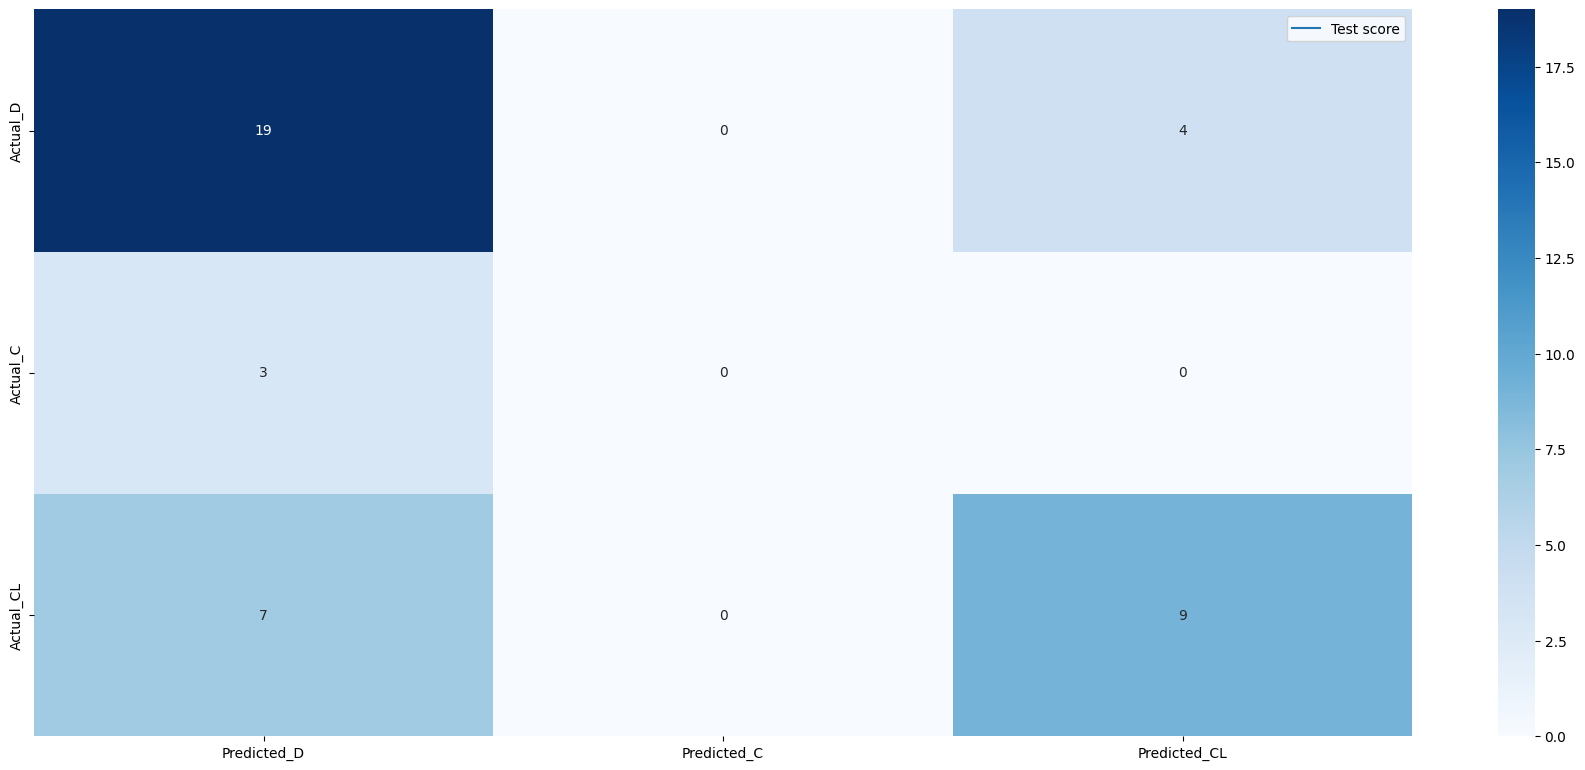

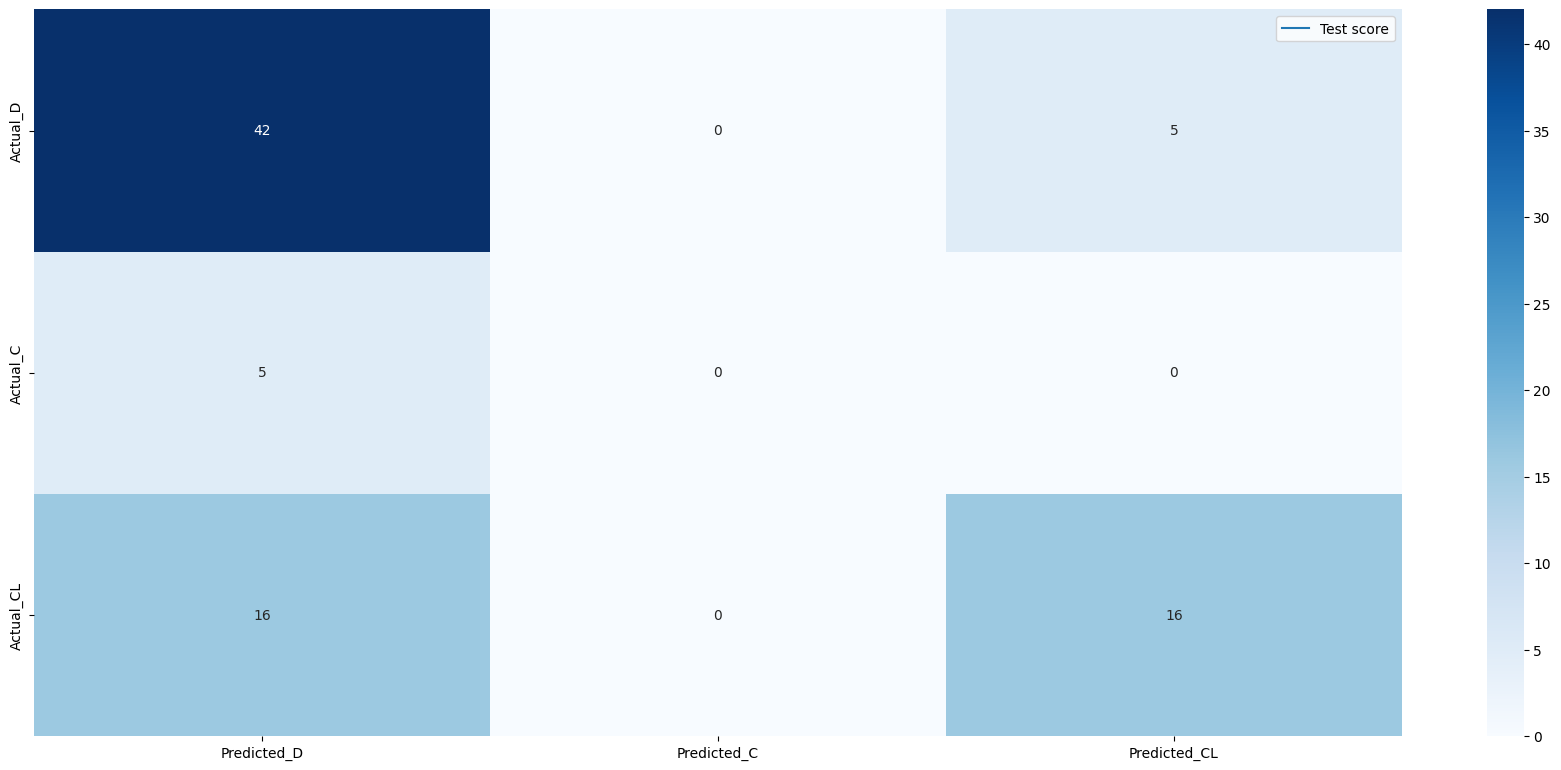

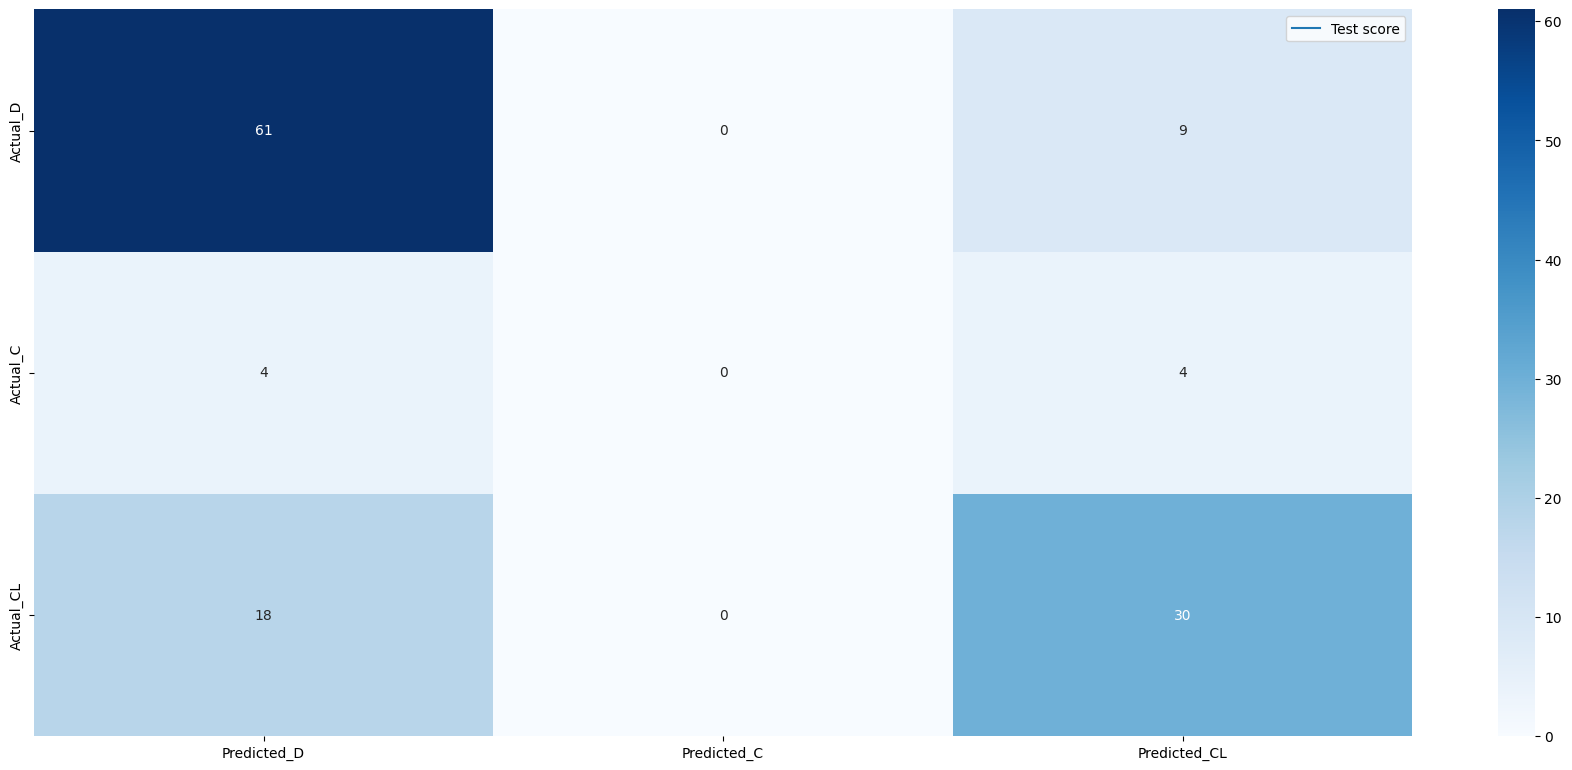

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from numpy import random
for test_size in test_sizes:
  accuracies=[]
  neighbors =  range(1, 21)
  for i  in range(20):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,stratify=Y, random_state=i)
    svm_model = SVC(kernel='linear', C=1)
    svm_model.fit(X_train,Y_train)
    predicted = svm_model.predict(X_test)
    expected = Y_test
    accuracy = accuracy_score(expected,predicted) * 100
    accuracies.append(accuracy)
    print(f' Accuracy for iteration  {i+1} : {accuracy:.2f}%')

  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)
  mean_accuracy = np.mean(accuracies)
  variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
  standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

  plt.figure(figsize=(18, 8))
  plt.plot(neighbors, accuracies, label="Test score")
  plt.xticks(np.arange(1, 21, 1))
  plt.xlabel("ITERATIONS")
  plt.ylabel("ACCURACY SCORE")
  plt.legend()
  plt.tight_layout()


  print(f'\nMean accuracy: {mean_accuracy:.2f}%')
  print(f'\nVariance accuracy: {variance_accuracy:.2f}%')
  print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.2f}%')
  import time
  from sklearn.metrics import confusion_matrix
  t0 = time.time()
  svm_model.fit(X_train,Y_train)
  Y_pred1 = svm_model.predict(X_test)
  accuracy=accuracy_score(Y_test,Y_pred1)
  print("Training time:", time.time()-t0)
  print("Accuracy:",accuracy)
  list_accuracy_svm.append(accuracy)
  test_data=np.array(Y_test)
  cm = confusion_matrix(test_data,Y_pred1)
  recall=np.diag(cm)/np.sum(cm,axis=1)#see muticlass classifiction for recall and precision
  precision=np.diag(cm)/np.sum(cm,axis=0)
  mean_recall=np.mean(recall)
  mean_precision=np.mean(precision)
  print("Mean_recall:",mean_recall)
  print("Mean_precision:",mean_precision)
  import seaborn as sns
  #List = ['D','C','CL']
  #fig=plt.figure(figsize=(17,5))
  #ax1=plt.subplot(121)
  #sn.heatmap(cm,annot=True,cmap='Reds',yticklabels=List,xticklabels=List)
  #pd.crosstab(List,List)
  labels = ['C','CL','D']
  def plot2(y_true, y_pred):
    labels = ['C','CL','D']
    column = [f'Predicted_{label}' for label in labels]
    indices = [f'Actual_{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)
    return sns.heatmap(table, annot=True, fmt='d', cmap='Blues')
    fig=plt.figure(figsize=(17,5))
    ax1=plt.subplot(121)
    return sns.heatmap(table,annot=True,cmap='Blues',yticklabels=column,xticklabels=indices)

  plot2(test_data, Y_pred1);
  #pd.crosstab(List,List)
  from sklearn.metrics import classification_report
  print(classification_report(test_data,Y_pred1))

<ipython-input-36-706041ad3dbc>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 8))


<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

<Figure size 1800x800 with 0 Axes>

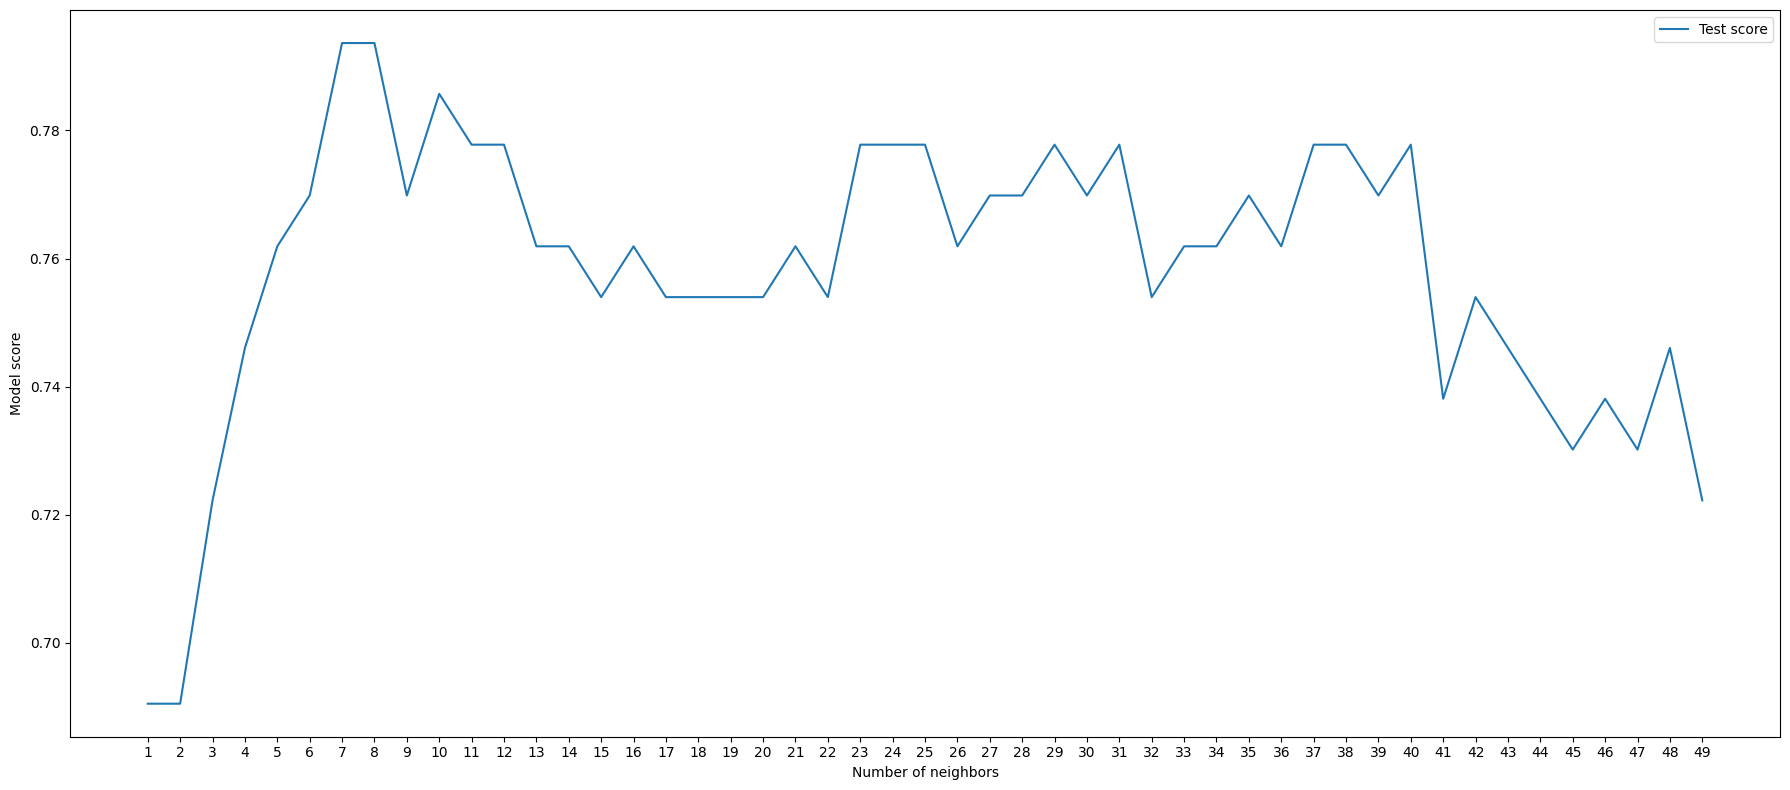

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
test_score = []
neighbors = range(1, 50)
for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    test_score.append(accuracy_score(Y_test, model.predict(X_test)))
    plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 50, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.grid(True)
plt.tight_layout()

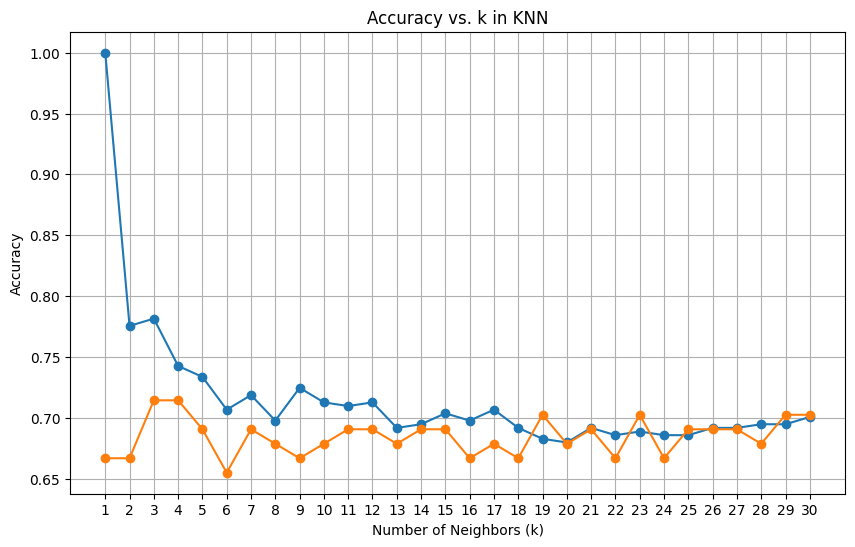

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=66)


neighbors = range(1, 31)  # Testing for n_neighbors from 1 to 30
train_accuracies = []
test_accuracies = []

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    # Predict on the training set
    Y_train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test set
    Y_test_pred = knn.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(test_accuracy)


# Step 4: Plot the results
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(neighbors, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.grid(True)
plt.xticks(np.arange(1, 31, 1))
plt.show()


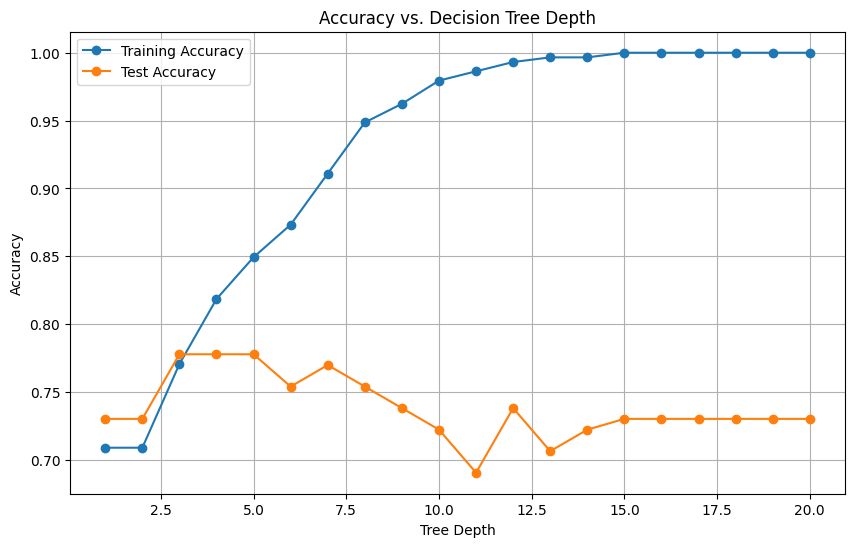

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=66)

# Define the range of depths to test
depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Create and train the decision tree classifier
    clf = DecisionTreeClassifier(max_depth=depth, random_state=66)
    clf.fit(X_train, Y_train)

    # Predict on the training set
    Y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    train_accuracies.append(train_accuracy)

    # Predict on the test set
    Y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Decision Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


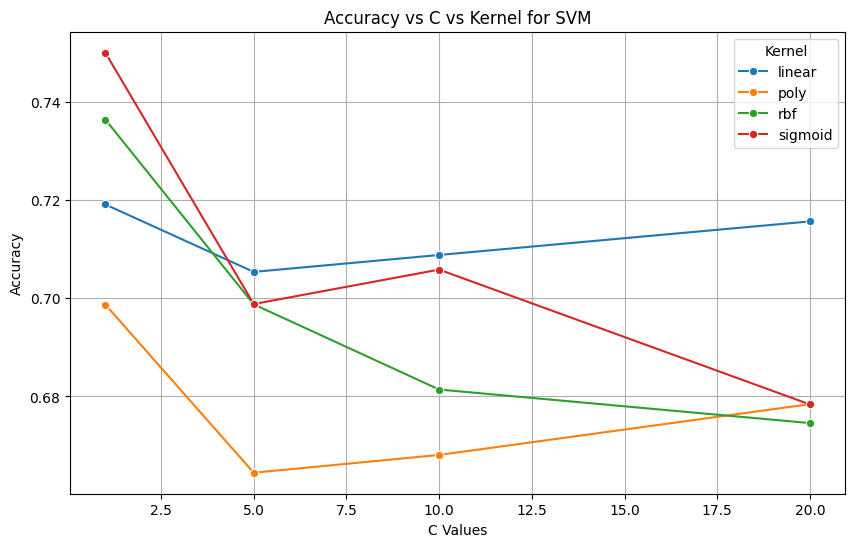

In [ ]:

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=66)
C_range = [1, 5, 10, 20]  # Range of C values
kernels = ['linear', 'poly', 'rbf', 'sigmoid']  # Different kernel types
results = []

for kernel in kernels:
    for C in C_range:
        svc = SVC(C=C, kernel=kernel)
        scores = cross_val_score(svc, X_train, Y_train, cv=5)
        mean_score = scores.mean()
        results.append((kernel, C, mean_score))
df_results = pd.DataFrame(results, columns=['Kernel', 'C', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_results, x='C', y='Accuracy', hue='Kernel', marker='o')


#plt.xscale('log')

plt.title('Accuracy vs C vs Kernel for SVM')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.legend(title='Kernel')
plt.grid(True)
plt.show()


 Accuracy for iteration  1 : 78.57
 Accuracy for iteration  2 : 80.95
 Accuracy for iteration  3 : 61.90
 Accuracy for iteration  4 : 69.05
 Accuracy for iteration  5 : 54.76
 Accuracy for iteration  6 : 78.57
 Accuracy for iteration  7 : 76.19
 Accuracy for iteration  8 : 66.67
 Accuracy for iteration  9 : 69.05
 Accuracy for iteration  10 : 57.14
 Accuracy for iteration  11 : 66.67
 Accuracy for iteration  12 : 85.71
 Accuracy for iteration  13 : 80.95
 Accuracy for iteration  14 : 71.43
 Accuracy for iteration  15 : 69.05
 Accuracy for iteration  16 : 69.05
 Accuracy for iteration  17 : 76.19
 Accuracy for iteration  18 : 83.33
 Accuracy for iteration  19 : 66.67
 Accuracy for iteration  20 : 73.81
 Accuracy for iteration  1 : 71.43
 Accuracy for iteration  2 : 63.10
 Accuracy for iteration  3 : 70.24
 Accuracy for iteration  4 : 67.86
 Accuracy for iteration  5 : 66.67
 Accuracy for iteration  6 : 75.00
 Accuracy for iteration  7 : 67.86
 Accuracy for iteration  8 : 75.00
 Accuracy

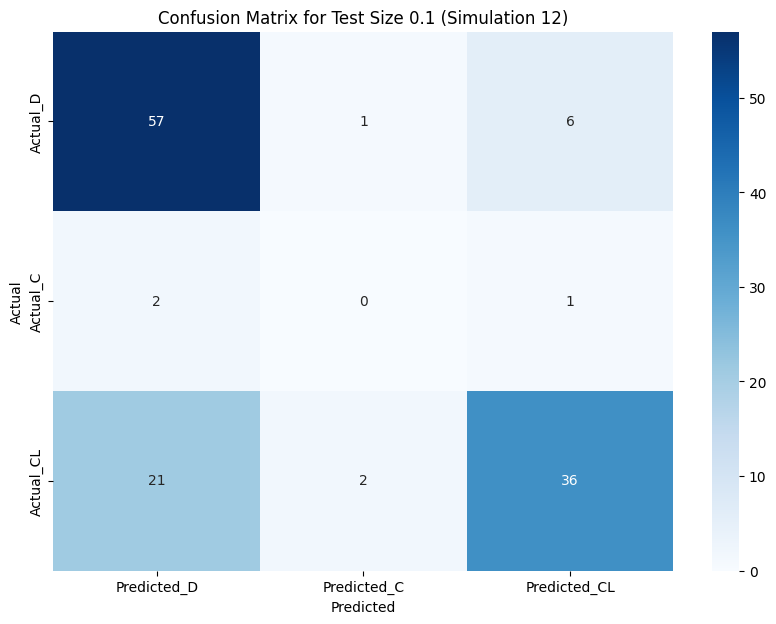

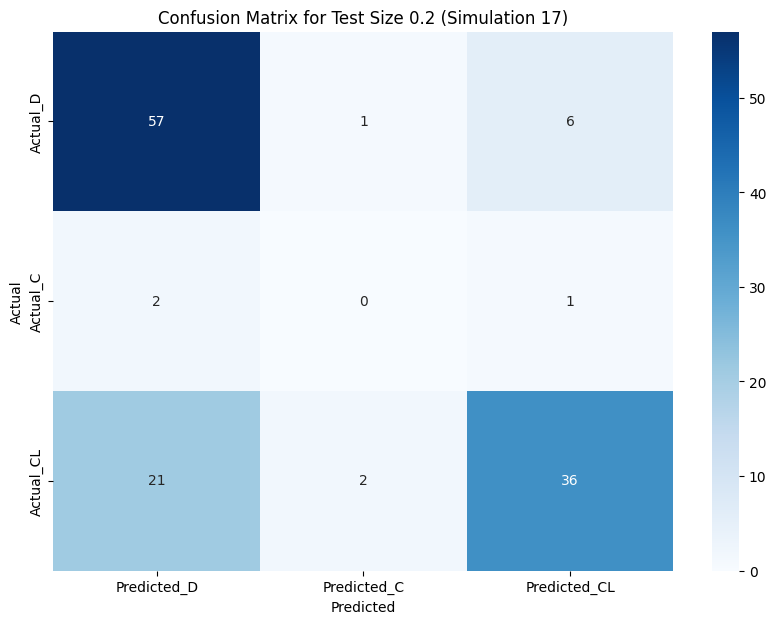

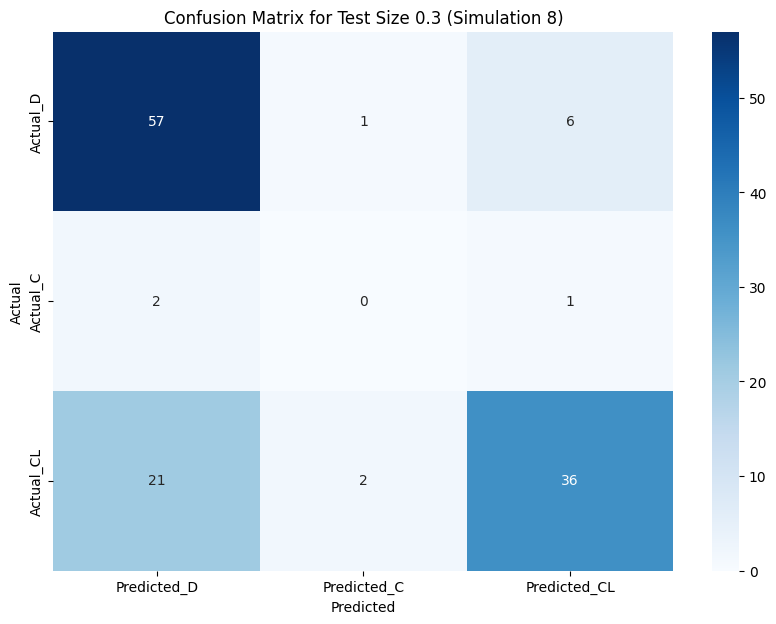

In [ ]:

#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import train_test_split
f#rom sklearn.tree import DecisionTreeClassifier
#from numpy import random
#import matplotlib.pyplot as plt
#import seaborn as sns

# Define test sizes
#test_sizes = [0.1, 0.2, 0.3]

#accuracies=[]
# Placeholder for storing results
#results = []

 #for test_size in test_sizes:
  #   for i in range(20):
        # Split data (replace with your actual data and method)
   #      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=i)

        # Train the model
    #     model = DecisionTreeClassifier(max_depth = 4 )
     #    model.fit(X_train, Y_train)

        # Make predictions
      #   Y_pred = model.predict(X_test)

        # Calculate accuracy
       #  accuracy = accuracy_score(Y_test, Y_pred) * 100
        # accuracies.append(accuracy)
        #accuracy = accuracy_score(expected,predicted) * 100
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


         #print(f' Accuracy for iteration  {i+1} : {accuracy:.2f}')
  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)

        # Save the results
         #results.append({
          #  'test_size': test_size,
           # 'simulation': i,
            #'accuracy': accuracy,
            #'y_test': Y_test,
            #'y_pred': Y_pred
         #})
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


        #print(f' Accuracy for iteration  {i+1} :  {accuracy:.2f}')
 #mean_accuracy = np.mean(accuracies)
 #variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
 #standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

 #print(f'\nMean accuracy: {mean_accuracy:.2f}%')
 #print(f'\nVariance accuracy: {variance_accuracy:.2f}%')
 #print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.2f}%')
# Convert results to DataFrame
 #results_df = pd.DataFrame(results)



# Find the best simulation for each test size
# best_simulations = results_df.loc[results_df.groupby('test_size')['accuracy'].idxmax()]

 #def plot_confusion_matrix(y_test, y_pred, test_size, simulation):
  #   labels = ['D','C','CL']
   #  column = [f'Predicted_{label}' for label in labels]
    # indices = [f'Actual_{label}' for label in labels]
     #cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred),columns=column, index=indices)
     #plt.figure(figsize=(10, 7))
     #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
     #plt.title(f'Confusion Matrix for Test Size {test_size} (Simulation {simulation+1})')
     #plt.xlabel('Predicted')
     #plt.ylabel('Actual')
     #plt.show()

# Plot confusion matrix for each best simulation
 #for index, row in best_simulations.iterrows():
  #   plot_confusion_matrix(row['y_test'], row['y_pred'], row['test_size'], row['simulation'])
     #def plot2(y_true, y_pred):
    #labels = ['D','C','CL']
    #column = [f'Predicted_{label}' for label in labels]
    #indices = [f'Actual_{label}' for label in labels]
    #table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)

 Accuracy for iteration  1 : 73.81
 Accuracy for iteration  2 : 76.19
 Accuracy for iteration  3 : 73.81
 Accuracy for iteration  4 : 71.43
 Accuracy for iteration  5 : 71.43
 Accuracy for iteration  6 : 78.57
 Accuracy for iteration  7 : 76.19
 Accuracy for iteration  8 : 73.81
 Accuracy for iteration  9 : 69.05
 Accuracy for iteration  10 : 64.29
 Accuracy for iteration  11 : 78.57
 Accuracy for iteration  12 : 83.33
 Accuracy for iteration  13 : 76.19
 Accuracy for iteration  14 : 71.43
 Accuracy for iteration  15 : 73.81
 Accuracy for iteration  16 : 80.95
 Accuracy for iteration  17 : 80.95
 Accuracy for iteration  18 : 73.81
 Accuracy for iteration  19 : 76.19
 Accuracy for iteration  20 : 76.19
 Accuracy for iteration  1 : 73.81
 Accuracy for iteration  2 : 73.81
 Accuracy for iteration  3 : 71.43
 Accuracy for iteration  4 : 73.81
 Accuracy for iteration  5 : 76.19
 Accuracy for iteration  6 : 73.81
 Accuracy for iteration  7 : 73.81
 Accuracy for iteration  8 : 78.57
 Accuracy

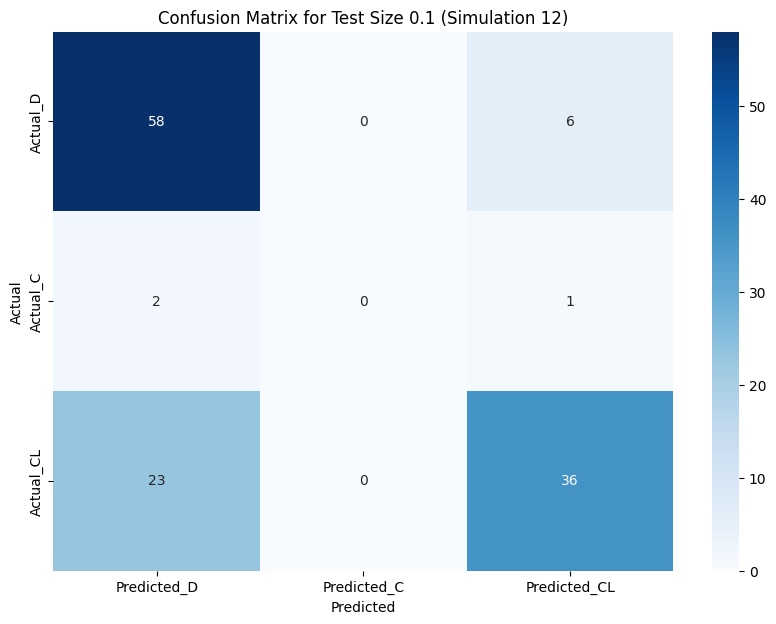

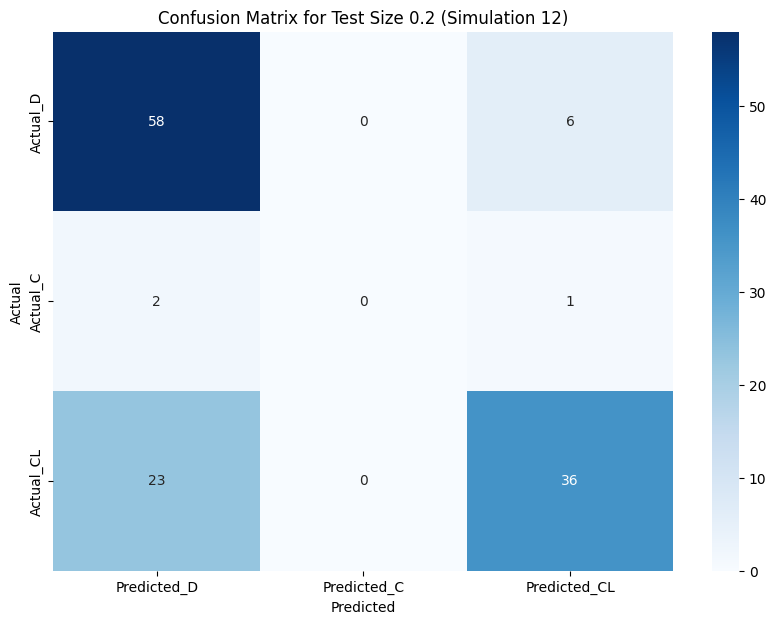

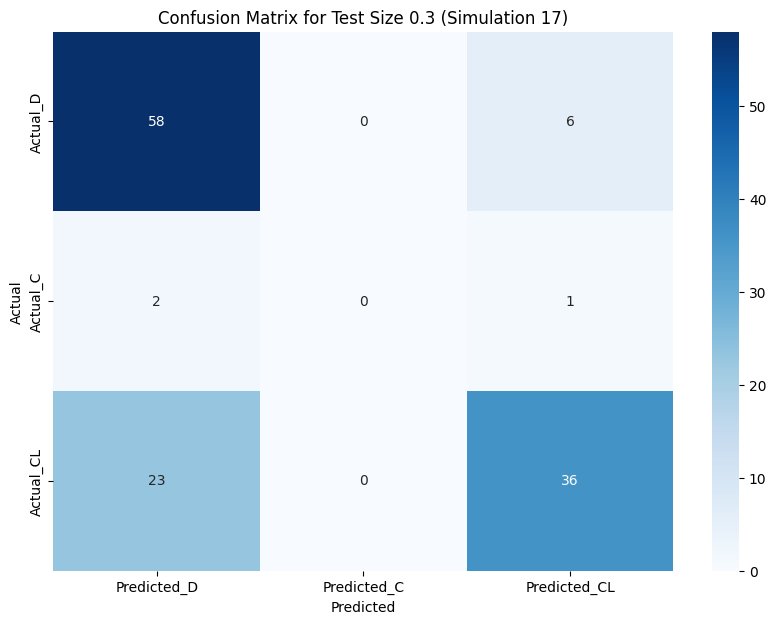

In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#from numpy import random
#import matplotlib.pyplot as plt
#import seaborn as sns

# Define test sizes
#test_sizes = [0.1, 0.2, 0.3]

#accuracies=[]
# Placeholder for storing results
#results = []

#for test_size in test_sizes:
 #   for i in range(20):
        # Split data (replace with your actual data and method)
  #      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=i)

        # Train the model
   #     model = SVC(kernel='linear', C=1 )
    #    model.fit(X_train, Y_train)

        # Make predictions
     #   Y_pred = model.predict(X_test)

        # Calculate accuracy
      #  accuracy = accuracy_score(Y_test, Y_pred) * 100
       # accuracies.append(accuracy)
        #accuracy = accuracy_score(expected,predicted) * 100
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


        #print(f' Accuracy for iteration  {i+1} : {accuracy:.2f}')
  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)

        # Save the results
     #   results.append({
      #      'test_size': test_size,
        #    'simulation': i,
         #   'accuracy': accuracy,
          #  'y_test': Y_test,
           # 'y_pred': Y_pred
         #})
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


        #print(f' Accuracy for iteration  {i+1} :  {accuracy:.2f}')
 #mean_accuracy = np.mean(accuracies)
 #variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
 #standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

 #print(f'\nMean accuracy: {mean_accuracy:.2f}%')
 #print(f'\nVariance accuracy: {variance_accuracy:.2f}%')
 #print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.2f}%')
# Convert results to DataFrame
#results_df = pd.DataFrame(results)



# Find the best simulation for each test size
#best_simulations = results_df.loc[results_df.groupby('test_size')['accuracy'].idxmax()]

#def plot_confusion_matrix(y_test, y_pred, test_size, simulation):
     #labels = ['D','C','CL']
     #column = [f'Predicted_{label}' for label in labels]
     #indices = [f'Actual_{label}' for label in labels]
     #cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred),columns=column, index=indices)
     #plt.figure(figsize=(10, 7))
     #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
     #plt.title(f'Confusion Matrix for Test Size {test_size} (Simulation {simulation+1})')
     #plt.xlabel('Predicted')
     #plt.ylabel('Actual')
     #plt.show()

# Plot confusion matrix for each best simulation
#for index, row in best_simulations.iterrows():
 #   plot_confusion_matrix(row['y_test'], row['y_pred'], row['test_size'], row['simulation'])
     #def plot2(y_true, y_pred):
    #labels = ['D','C','CL']
    #column = [f'Predicted_{label}' for label in labels]
    #indices = [f'Actual_{label}' for label in labels]
    #table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)

 Accuracy for iteration  1 : 64.29
 Accuracy for iteration  2 : 59.52
 Accuracy for iteration  3 : 64.29
 Accuracy for iteration  4 : 57.14
 Accuracy for iteration  5 : 57.14
 Accuracy for iteration  6 : 54.76
 Accuracy for iteration  7 : 64.29
 Accuracy for iteration  8 : 57.14
 Accuracy for iteration  9 : 61.90
 Accuracy for iteration  10 : 52.38
 Accuracy for iteration  11 : 64.29
 Accuracy for iteration  12 : 69.05
 Accuracy for iteration  13 : 66.67
 Accuracy for iteration  14 : 57.14
 Accuracy for iteration  15 : 59.52
 Accuracy for iteration  16 : 64.29
 Accuracy for iteration  17 : 73.81
 Accuracy for iteration  18 : 64.29
 Accuracy for iteration  19 : 57.14
 Accuracy for iteration  20 : 66.67
 Accuracy for iteration  1 : 66.67
 Accuracy for iteration  2 : 58.33
 Accuracy for iteration  3 : 64.29
 Accuracy for iteration  4 : 65.48
 Accuracy for iteration  5 : 59.52
 Accuracy for iteration  6 : 63.10
 Accuracy for iteration  7 : 57.14
 Accuracy for iteration  8 : 59.52
 Accuracy

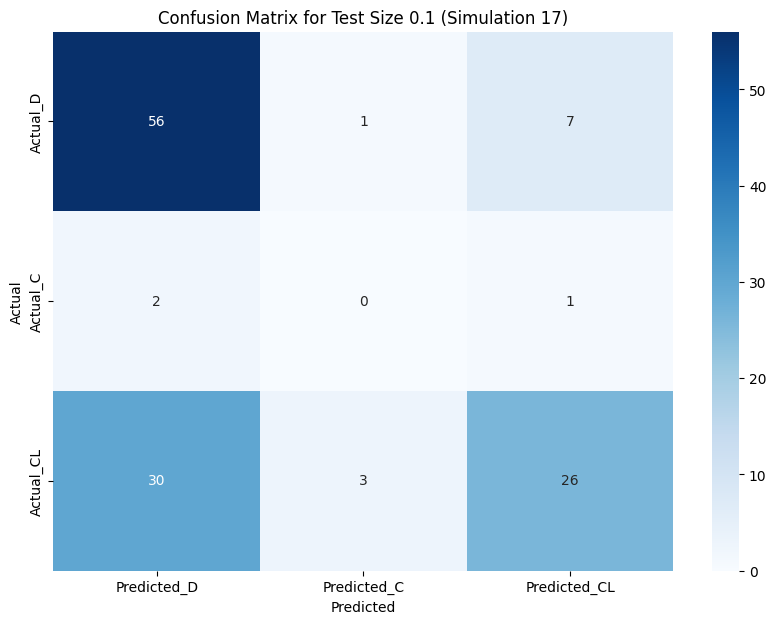

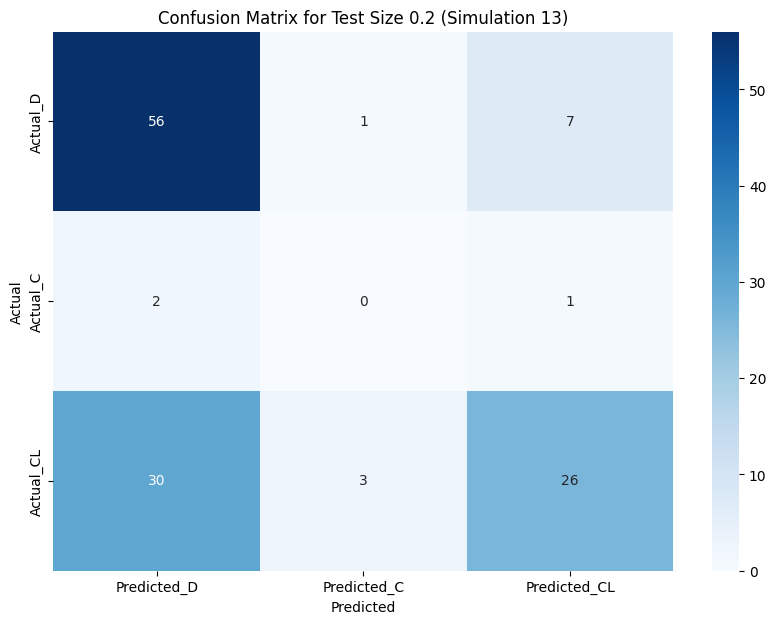

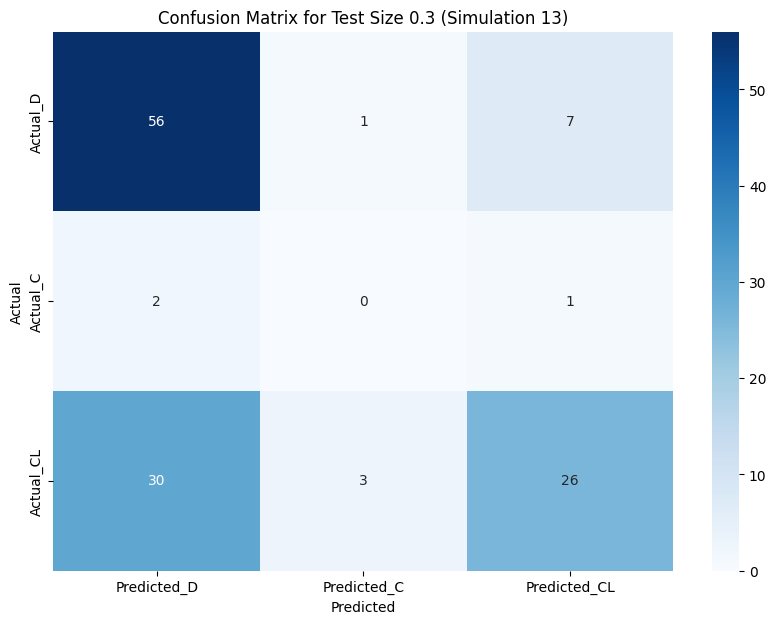

In [ ]:
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from numpy import random
#import matplotlib.pyplot as plt
#import seaborn as sns

# Define test sizes
#test_sizes = [0.1, 0.2, 0.3]

#accuracies=[]
# Placeholder for storing results
#results = []

#for test_size in test_sizes:
#    for i in range(20):
        # Split data (replace with your actual data and method)
 #       X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=i)

        # Train the model
  #      model = KNeighborsClassifier(n_neighbors=3 )
   #     model.fit(X_train, Y_train)

        # Make predictions
    #    Y_pred = model.predict(X_test)

        # Calculate accuracy
     #   accuracy = accuracy_score(Y_test, Y_pred) * 100
     #   accuracies.append(accuracy)
        #accuracy = accuracy_score(expected,predicted) * 100
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


      #  print(f' Accuracy for iteration  {i+1} : {accuracy:.2f}')
  #mean_accuracy = np.mean(accuracies)
  #variance_accuracy = np.var(accuracies)
  #standard_deviation_accuracy = np.std(accuracies)

        # Save the results
       # results.append({
        #    'test_size': test_size,
         #   'simulation': i,
          #  'accuracy': accuracy,
           # 'y_test': Y_test,
            #'y_pred': Y_pred
         #})
        #accuracies.append(accuracy)
        #print(f" Accuracy for iteration  {i+1} : {accuracy:.2f}%, {random_state}")


        #print(f' Accuracy for iteration  {i+1} :  {accuracy:.2f}')
 #mean_accuracy = np.mean(accuracies)
 #variance_accuracy = np.mean((accuracies - np.mean(accuracies)) ** 2)
 #standard_deviation_accuracy = np.sqrt(np.mean((accuracies - np.mean(accuracies)) ** 2))

 #print(f'\nMean accuracy: {mean_accuracy:.2f}%')
 #print(f'\nVariance accuracy: {variance_accuracy:.2f}%')
 #print(f'\nStandard deviation accuracy: {standard_deviation_accuracy:.2f}%')
# Convert results to DataFrame
#results_df = pd.DataFrame(results)



# Find the best simulation for each test size
#best_simulations = results_df.loc[results_df.groupby('test_size')['accuracy'].idxmax()]

#def plot_confusion_matrix(y_test, y_pred, test_size, simulation):
 #    labels = ['D','C','CL']
 #    column = [f'Predicted_{label}' for label in labels]
  #   indices = [f'Actual_{label}' for label in labels]
   #  cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred),columns=column, index=indices)
    # plt.figure(figsize=(10, 7))
     #sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
     #plt.title(f'Confusion Matrix for Test Size {test_size} (Simulation {simulation+1})')
     #plt.xlabel('Predicted')
     #plt.ylabel('Actual')
     #plt.show()

# Plot confusion matrix for each best simulation
#for index, row in best_simulations.iterrows():
 #   plot_confusion_matrix(row['y_test'], row['y_pred'], row['test_size'], row['simulation'])
     #def plot2(y_true, y_pred):
    #labels = ['D','C','CL']
    #column = [f'Predicted_{label}' for label in labels]
    #indices = [f'Actual_{label}' for label in labels]
    #table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns=column, index=indices)


Test size: 0.1
  Accuracy of KNN for simulation 1: 64.29%
  Accuracy of KNN for simulation 2: 59.52%
  Accuracy of KNN for simulation 3: 64.29%
  Accuracy of KNN for simulation 4: 57.14%
  Accuracy of KNN for simulation 5: 57.14%
  Accuracy of KNN for simulation 6: 52.38%
  Accuracy of KNN for simulation 7: 64.29%
  Accuracy of KNN for simulation 8: 57.14%
  Accuracy of KNN for simulation 9: 64.29%
  Accuracy of KNN for simulation 10: 52.38%
  Accuracy of KNN for simulation 11: 64.29%
  Accuracy of KNN for simulation 12: 69.05%
  Accuracy of KNN for simulation 13: 66.67%
  Accuracy of KNN for simulation 14: 57.14%
  Accuracy of KNN for simulation 15: 59.52%
  Accuracy of KNN for simulation 16: 64.29%
  Accuracy of KNN for simulation 17: 73.81%
  Accuracy of KNN for simulation 18: 64.29%
  Accuracy of KNN for simulation 19: 57.14%
  Accuracy of KNN for simulation 20: 66.67%
  Accuracy of KNN for simulation 21: 66.67%

Mean Accuracy: 62.02%
Variance of Accuracy: 28.87
Standard Deviation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


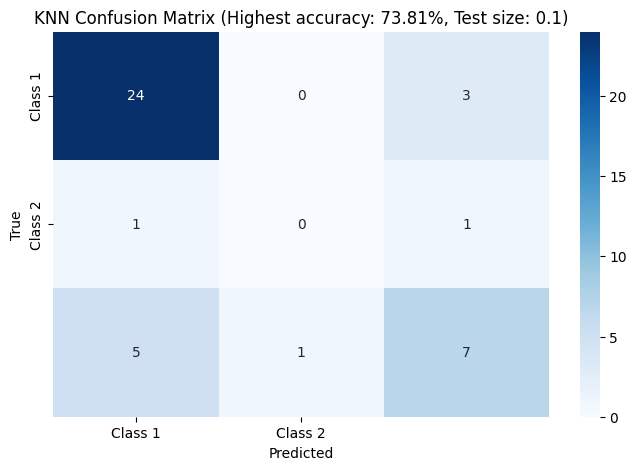


Test size: 0.2
  Accuracy of KNN for simulation 1: 66.67%
  Accuracy of KNN for simulation 2: 58.33%
  Accuracy of KNN for simulation 3: 63.10%
  Accuracy of KNN for simulation 4: 65.48%
  Accuracy of KNN for simulation 5: 59.52%
  Accuracy of KNN for simulation 6: 61.90%
  Accuracy of KNN for simulation 7: 57.14%
  Accuracy of KNN for simulation 8: 59.52%
  Accuracy of KNN for simulation 9: 64.29%
  Accuracy of KNN for simulation 10: 60.71%
  Accuracy of KNN for simulation 11: 66.67%
  Accuracy of KNN for simulation 12: 60.71%
  Accuracy of KNN for simulation 13: 70.24%
  Accuracy of KNN for simulation 14: 61.90%
  Accuracy of KNN for simulation 15: 69.05%
  Accuracy of KNN for simulation 16: 67.86%
  Accuracy of KNN for simulation 17: 69.05%
  Accuracy of KNN for simulation 18: 67.86%
  Accuracy of KNN for simulation 19: 59.52%
  Accuracy of KNN for simulation 20: 64.29%
  Accuracy of KNN for simulation 21: 67.86%

Mean Accuracy: 63.89%
Variance of Accuracy: 15.30
Standard Deviation

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


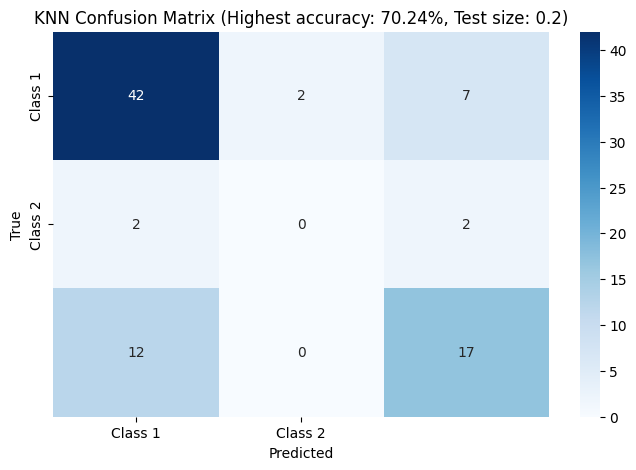


Test size: 0.3
  Accuracy of KNN for simulation 1: 62.70%
  Accuracy of KNN for simulation 2: 61.90%
  Accuracy of KNN for simulation 3: 64.29%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy of KNN for simulation 4: 63.49%
  Accuracy of KNN for simulation 5: 60.32%
  Accuracy of KNN for simulation 6: 61.90%
  Accuracy of KNN for simulation 7: 60.32%
  Accuracy of KNN for simulation 8: 58.73%
  Accuracy of KNN for simulation 9: 64.29%
  Accuracy of KNN for simulation 10: 59.52%
  Accuracy of KNN for simulation 11: 65.87%
  Accuracy of KNN for simulation 12: 61.90%
  Accuracy of KNN for simulation 13: 69.84%
  Accuracy of KNN for simulation 14: 67.46%
  Accuracy of KNN for simulation 15: 67.46%
  Accuracy of KNN for simulation 16: 65.87%
  Accuracy of KNN for simulation 17: 69.84%
  Accuracy of KNN for simulation 18: 67.46%
  Accuracy of KNN for simulation 19: 61.11%
  Accuracy of KNN for simulation 20: 65.08%
  Accuracy of KNN for simulation 21: 61.11%

Mean Accuracy: 63.83%
Variance of Accuracy: 10.41
Standard Deviation of Accuracy: 3.23

Confusion Matrix for the highest accuracy (69.84%):
[[64  2 10]
 [ 3  0  5]
 [17  1 24]]
Classification Report for the highes

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


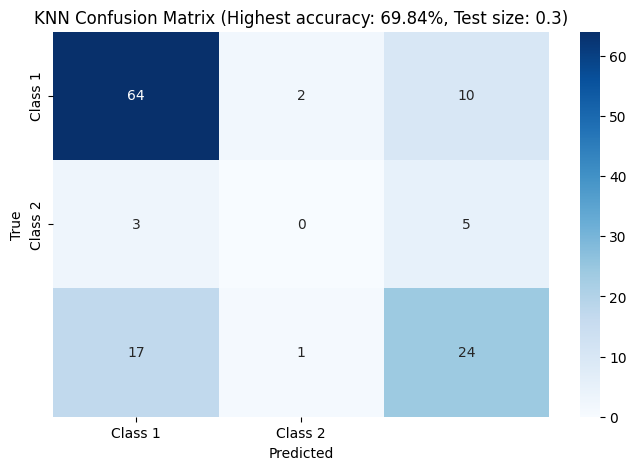

CONFUSION MATRICES FOR HIGHEST ACCURACIES

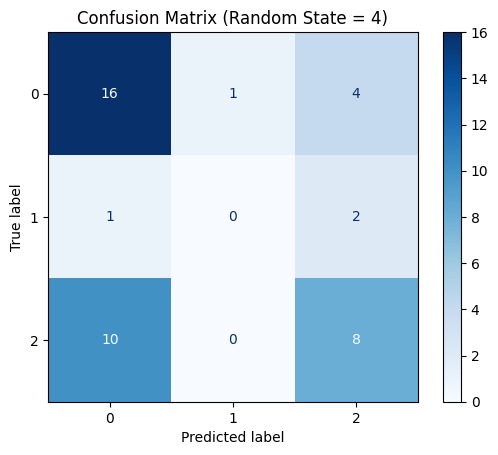

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=4)

# Train a classifier (Random Forest in this case)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 4)')
plt.show()

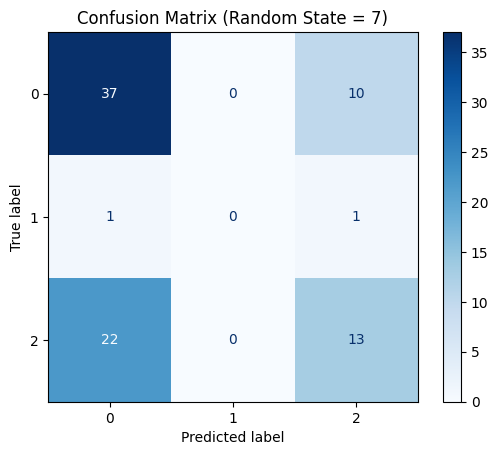

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

# Train a classifier (Random Forest in this case)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 7)')
plt.show()

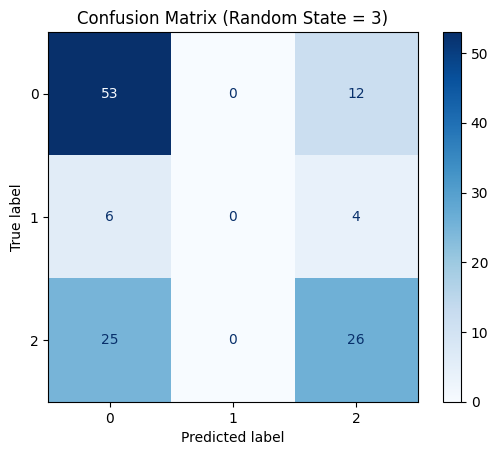

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

# Train a classifier (Random Forest in this case)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 3)')
plt.show()

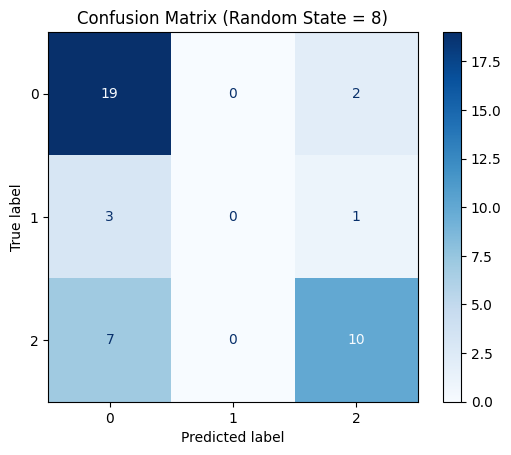

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=8)

# Train a classifier (Random Forest in this case)
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 8)')
plt.show()

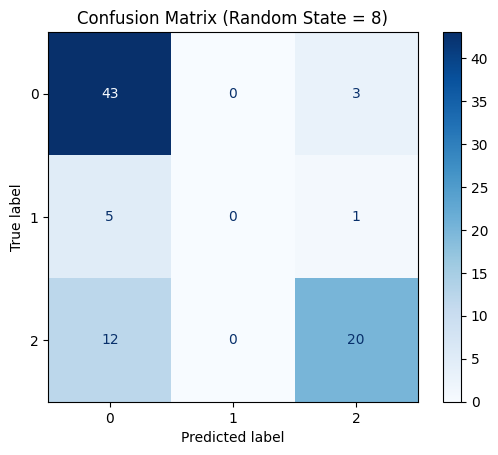

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

# Train a classifier (Random Forest in this case)
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 8)')
plt.show()

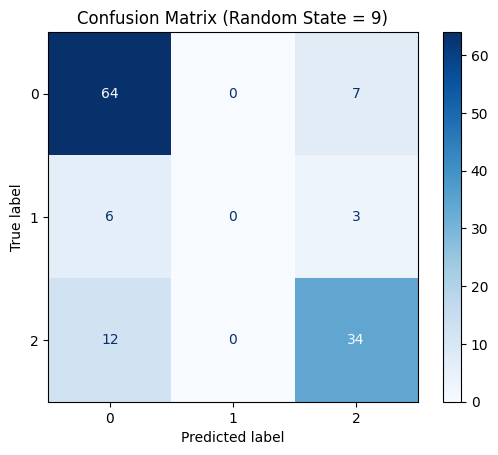

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

# Train a classifier (Random Forest in this case)
clf = SVC(kernel = 'linear', C = 1)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 9)')
plt.show()

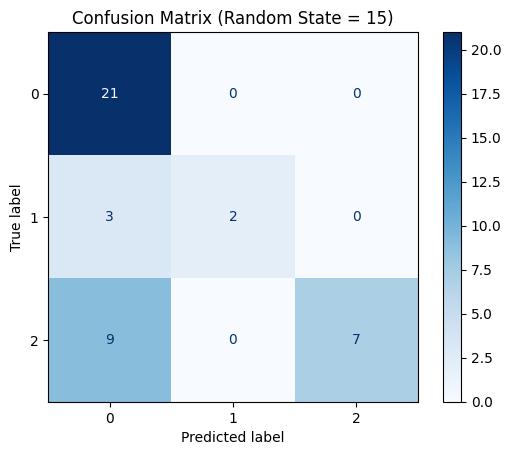

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=15)

# Train a classifier (Random Forest in this case)
clf = DecisionTreeClassifier(max_depth = 4)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 15)')
plt.show()

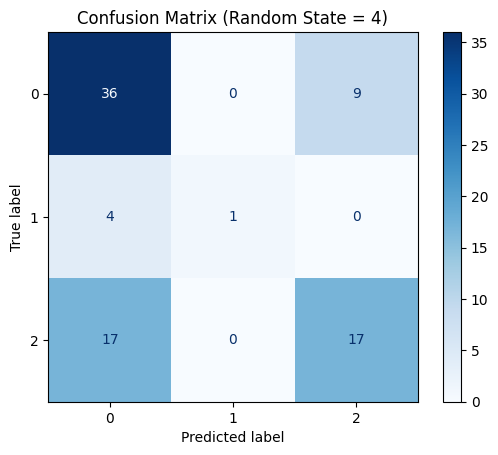

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

# Train a classifier (Random Forest in this case)
clf = DecisionTreeClassifier(max_depth = 3)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 4)')
plt.show()

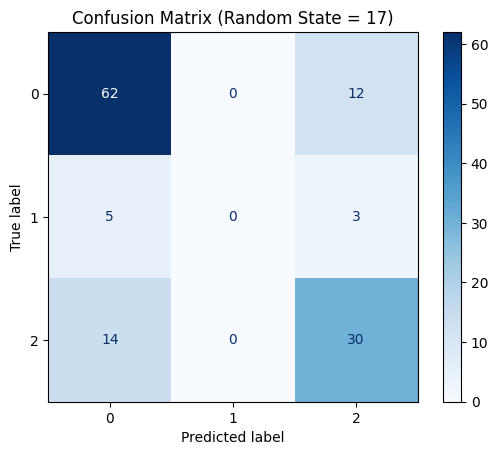

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=17)

# Train a classifier (Random Forest in this case)
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Random State = 17)')
plt.show()